<a href="https://colab.research.google.com/github/C-Burrows/Softwar.eTec.Assessment/blob/main/csp_celldata_prodictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Precicton (Capstone Project)
The Capstone project is to understand and create a predictive model around a dataset. The one provide is come from the website Kaggle  centered around a mobile price prediction. This document will go through the steps from the first looks of the data to the full functioning final product at the end explaining the code and any related information.

# Section 1

---


In this section we will be taking an inside look into the mobile phone data set. This is done through these steps:
1.	General Code set up.
2.	First look at the data

    2a.	Full data set (15 at a time)

    2b.	Price graph

    2c.	Top 5

    2d.	Bottom 5

    2e.	Generalized data.

    2f.	Data type

    2g.	Understanding no data set

    2h.	Unique data

    2i.	General review
    
    2j.	assigning data type


## General Code Set-Up
The general set up code is common coding practice for good usability and organizational purposes. This allows for libraries downloads and directory paths to be easily set and changed if necessary:

### Imports for section 1

This section provides all of the imports used within section one, allowing a brief discussion of the code imports and a link to the website to provide additional information if necessary.


In [ ]:
# Set up imports
from google.colab import drive
import warnings
# Data related imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####Pandas
User Guide - https://pandas.pydata.org/docs/user_guide/index.html
Pandas allows you to read data from various file formats (CSV, Excel, SQL databases, etc.) into Data Frames.


```
CellData=pd.read_csv
```




An example of calling on the pandas library used to read the csv file containing the cell phone data.






####Numpy
User Guide - https://numpy.org/doc/stable/user/index.html#user
NumPy provides tools for generating random numbers and sampling from various distributions. For this project it is mainly used for random selection of data.



####Matplotlib.pyplot
User Guide - https://matplotlib.org/stable/users/index.html#
Matplotlib is a library that allows you to create various types of plots, charts, and graphs. For this project this will be the main library that will be called to create graphs
```
%matplotlib inline
CellData['Price'].hist()
```

This is calling on matplotlib and building a histogram based on the CellData

###Connection to Google drive:



This Code is importing google.colab to allow access and storage of folders and files to Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


###Checking file path:



This is running a check to make sure the path is correct.

In [ ]:
%cd /content/drive/MyDrive/UNI/Software.Tec.1/CELLPHONE_CAPSTONE_PROJECT

/content/drive/MyDrive/UNI/Software.Tec.1/CELLPHONE_CAPSTONE_PROJECT


###Understanding the directory:



When this code is run it outputs what is within the given directory path.

In [ ]:
!ls /content/drive/MyDrive/UNI/Software.Tec.1/CELLPHONE_CAPSTONE_PROJECT

Cellphone.csv  DataForML.pkl  Final_XGB_Model.pkl


###Warnings



The import helps support warnings, the second sets up a filer to ignore lines

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Initial Data Inspection


###Importting dataset

Then goes through and prints the shape (columns and rows of the table) then delates any duplicates and prints the shape again to understand whether there were any duplicate rows within the data.

1.	reads the CSV file which is where the CellData set is stored
2.	Then goes through and prints the shape (columns and rows of the table)
3.	then delates any duplicates
4.	prints the shape again
a.	this will help identify any duplicate rows
5.	rounds all data to 3 decimal places.
a.	simplification of data noting all data is less than 3 decimal places anyway.
6.	Printing the first 15 rows of the table


In [ ]:
CellData=pd.read_csv('/content/drive/MyDrive/UNI/Software.Tec.1/CELLPHONE_CAPSTONE_PROJECT/Cellphone.csv', encoding='latin')
print('Shape before deleting duplicate values:', CellData.shape)
CellData=CellData.drop_duplicates()
print('Shape After deleting duplicate values:', CellData.shape)
CellData.round(3)
CellData.head(15)


Shape before deleting duplicate values: (161, 14)
Shape After deleting duplicate values: (161, 14)


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


### Price Histogram

This is the creation of the price histogram and the labeling of the axis

<Axes: title={'center': 'Price Distribution'}, xlabel='Price', ylabel='Frequency'>

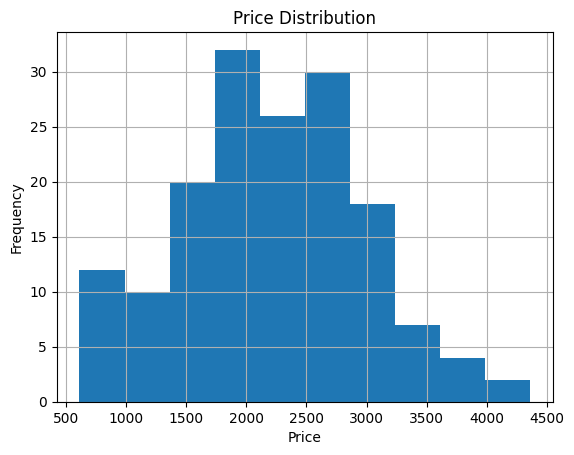

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_title("Price Distribution")
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
%matplotlib inline
CellData['Price'].hist()


### Top 5

This outputs the top 5 of the data set

In [ ]:
CellData.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


### Bottom 5

This outputs the bottom 5 of the data set

In [ ]:
CellData.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


###  Generalized Data

Each of the following columns show:
-	Count: total number of observations
-	Mean: average value of the data
-	Standard deviation: the dispersion of data
-	Minimum: smallest valued data
-	25%: The value below which 25% of the data falls
-	50%: the middle value (the median)
-	75%: The value below which 75% of the data falls
-	Maximum: the largest valued data
This give insight into the range and variability of data.


In [ ]:
CellData.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


### Data type

This section is reading the data from the dataset and outputting various types of data e.g. (int64 & float64). As well as the memory usage

In [ ]:
CellData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


### Understanding no Data set

This is understanding if there are any null data that could skew with the data.

In [ ]:
CellData.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

### Unique Data

Looking at any unique values within each of the column

In [ ]:
CellData.nunique()

Product_id       83
Price            81
Sale            125
weight           62
resoloution      24
ppi              45
cpu core          6
cpu freq         28
internal mem     10
ram              12
RearCam          18
Front_Cam        15
battery          55
thickness        49
dtype: int64

##General Review

Looking at this out there were no duplicate columns or rows. There are 161 row & 14 columns within our given data set. The Columns are as follows:
•	Product Id - ID of each cellphone
•	Price - Price of each cellphone
•	Sale - Sales number
•	Weight - Weight of each cellphone
•	Resolution - Resolution of each cellphone
•	PPI - Phone Pixel Density
•	CPU core - type of CPU core in each cellphone
•	CPU frequency - CPU Frequency in each cellphone in Hertz (Hz)
•	internal memory - Internal memory of each cellphone both read-only memory (ROM) and random-access memory (RAM)
•	Ram - Random-Access Memory of each cellphone
•	Rear Camera - The camera is located on the back of a device.
•	Front Camera - The camera is located on the front of a device.
•	battery - The power source for electronic devices
•	thickness - The measurement of how thin or thick a device.


# Section 2

---



### Imports for section 2

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#For AV Test
from scipy.stats import f_oneway

### Categorical Data

This section contains all of the categorical data from the data set:
- CPU Core
- Rear Camara
- Frount Camara
- Resolutoution

This data will be turned into different graphs to allow for a better understanding and comparison.


#### Histogram

Histograms for this data helps in identifying where most of the data points fall, the range of the data, and can provide insights into the central tendency, variability, and presence of any outliers in each feature.

array([[<Axes: title={'center': 'cpu core'}>,
        <Axes: title={'center': 'RearCam'}>],
       [<Axes: title={'center': 'Front_Cam'}>,
        <Axes: title={'center': 'resoloution'}>]], dtype=object)

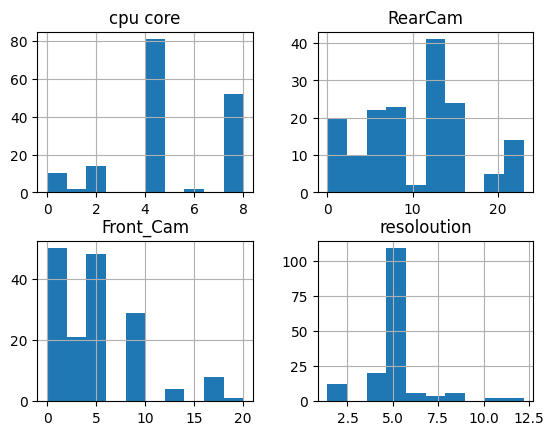

In [ ]:
CellData[['cpu core', 'RearCam', 'Front_Cam', 'resoloution']].hist()

####  Scatterplot Matrix/Pair Plot

 This visualization is a matrix of scatterplots that allows you to see the relationship between each pair of variables in a dataset. It's an effective tool for a quick overview of how each variable relates to the others. This also encapsulates the histogram data from above.

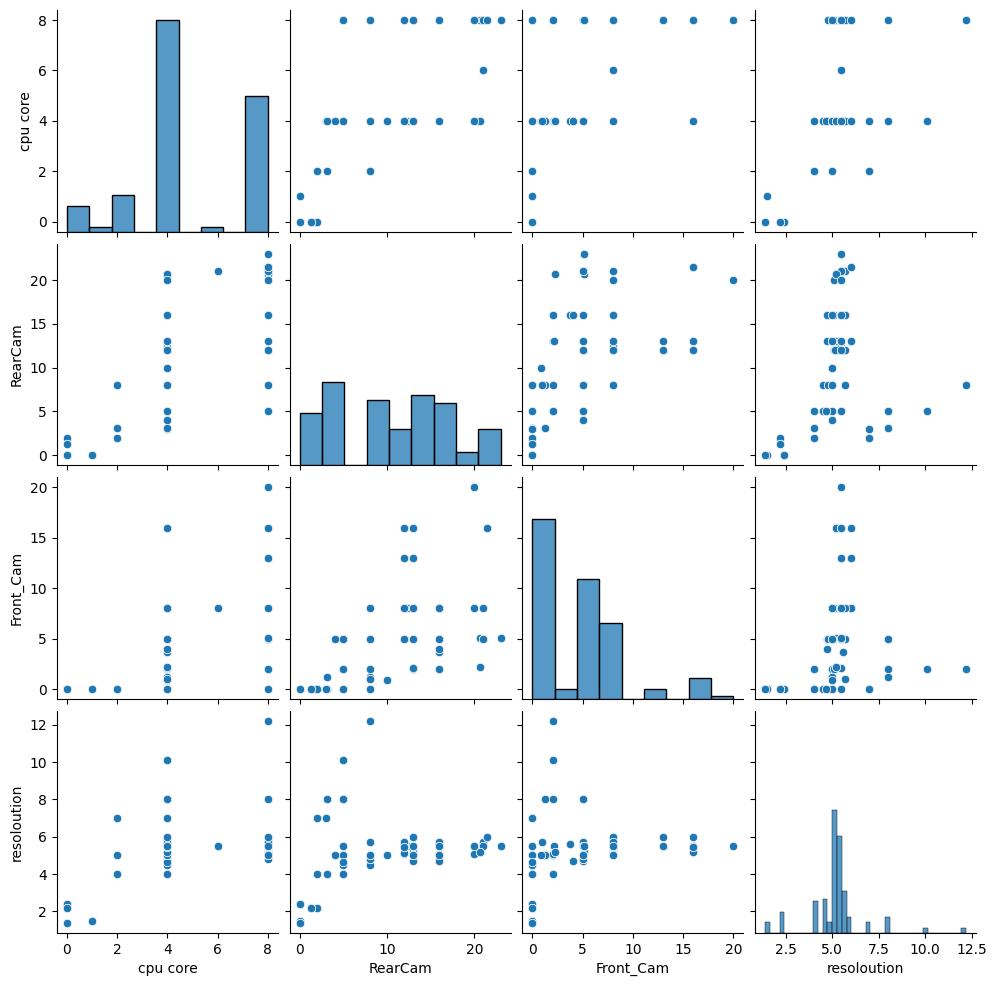

In [ ]:
sns.pairplot(CellData[['cpu core', 'RearCam', 'Front_Cam', 'resoloution']])

#### Bar Chat

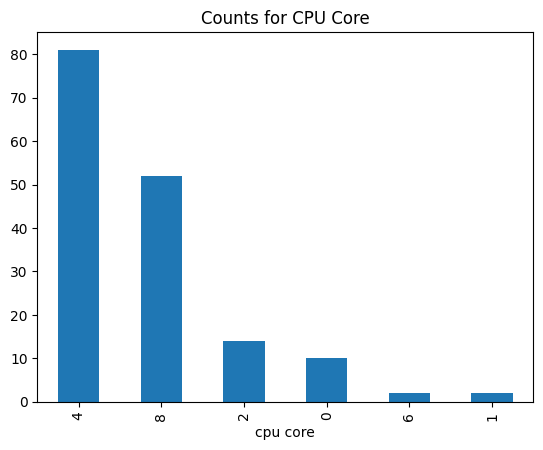

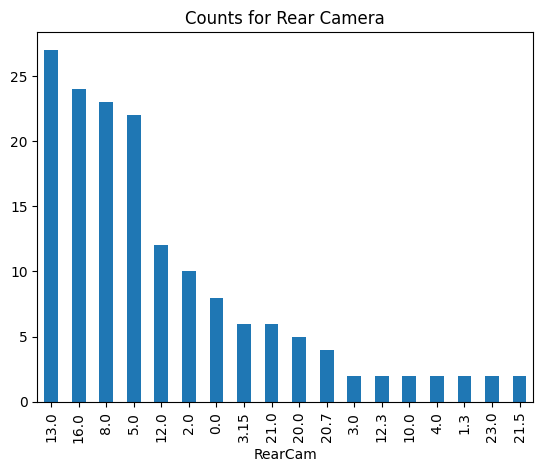

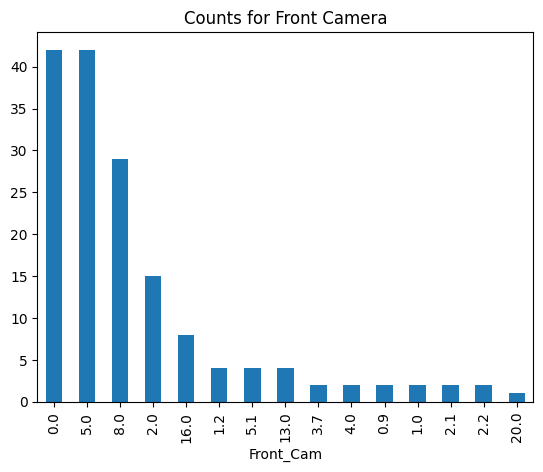

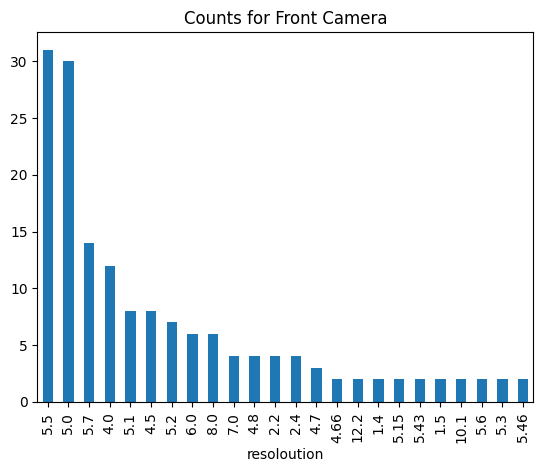

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for 'cpu core' counts
plt.figure()
CellData['cpu core'].value_counts().plot(kind='bar', title='Counts for CPU Core')
plt.show()

# Create a bar chart for 'RearCam' counts
plt.figure()
CellData['RearCam'].value_counts().plot(kind='bar', title='Counts for Rear Camera')
plt.show()

# Create a bar chart for 'Front_Cam' counts
plt.figure()
CellData['Front_Cam'].value_counts().plot(kind='bar', title='Counts for Front Camera')
plt.show()

# Create a bar chart for 'resolution' counts
plt.figure()
CellData['resoloution'].value_counts().plot(kind='bar', title='Counts for Front Camera')

plt.show()


#### Findings

????

### Continuous Data

XYZ

#### Histogram

Histograms for this data helps in identifying where most of the data points fall, the range of the data, and can provide insights into the central tendency, variability, and presence of any outliers in each feature.

array([[<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'cpu freq'}>],
       [<Axes: title={'center': 'internal mem'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'battery'}>],
       [<Axes: title={'center': 'thickness'}>,
        <Axes: title={'center': 'ppi'}>, <Axes: >]], dtype=object)

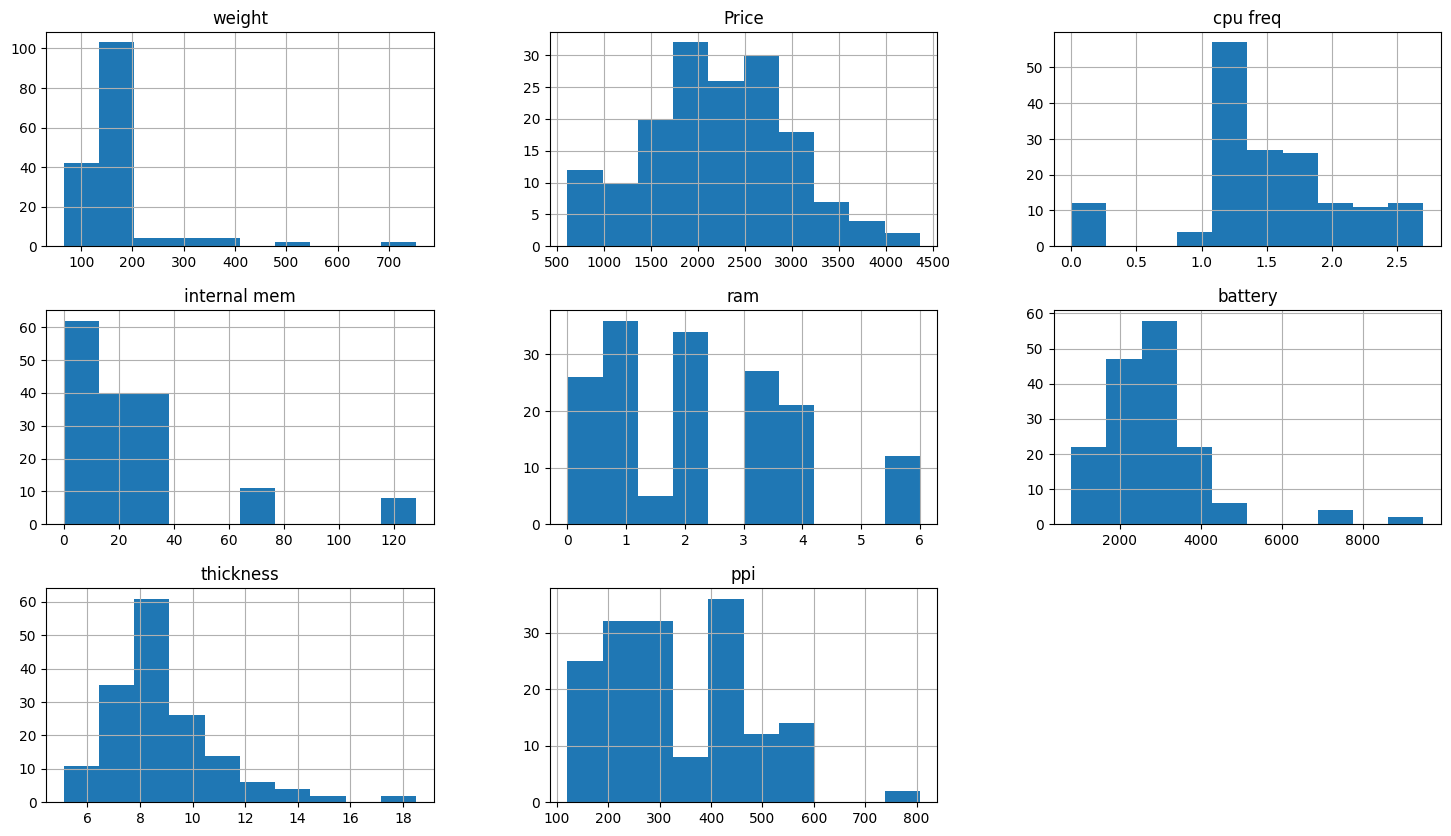

In [ ]:
CellData.hist(["weight","Price","cpu freq","internal mem","ram","battery","thickness","ppi"], figsize=(18,10))


####  Scatterplot Matrix/Pair Plot

XYZ

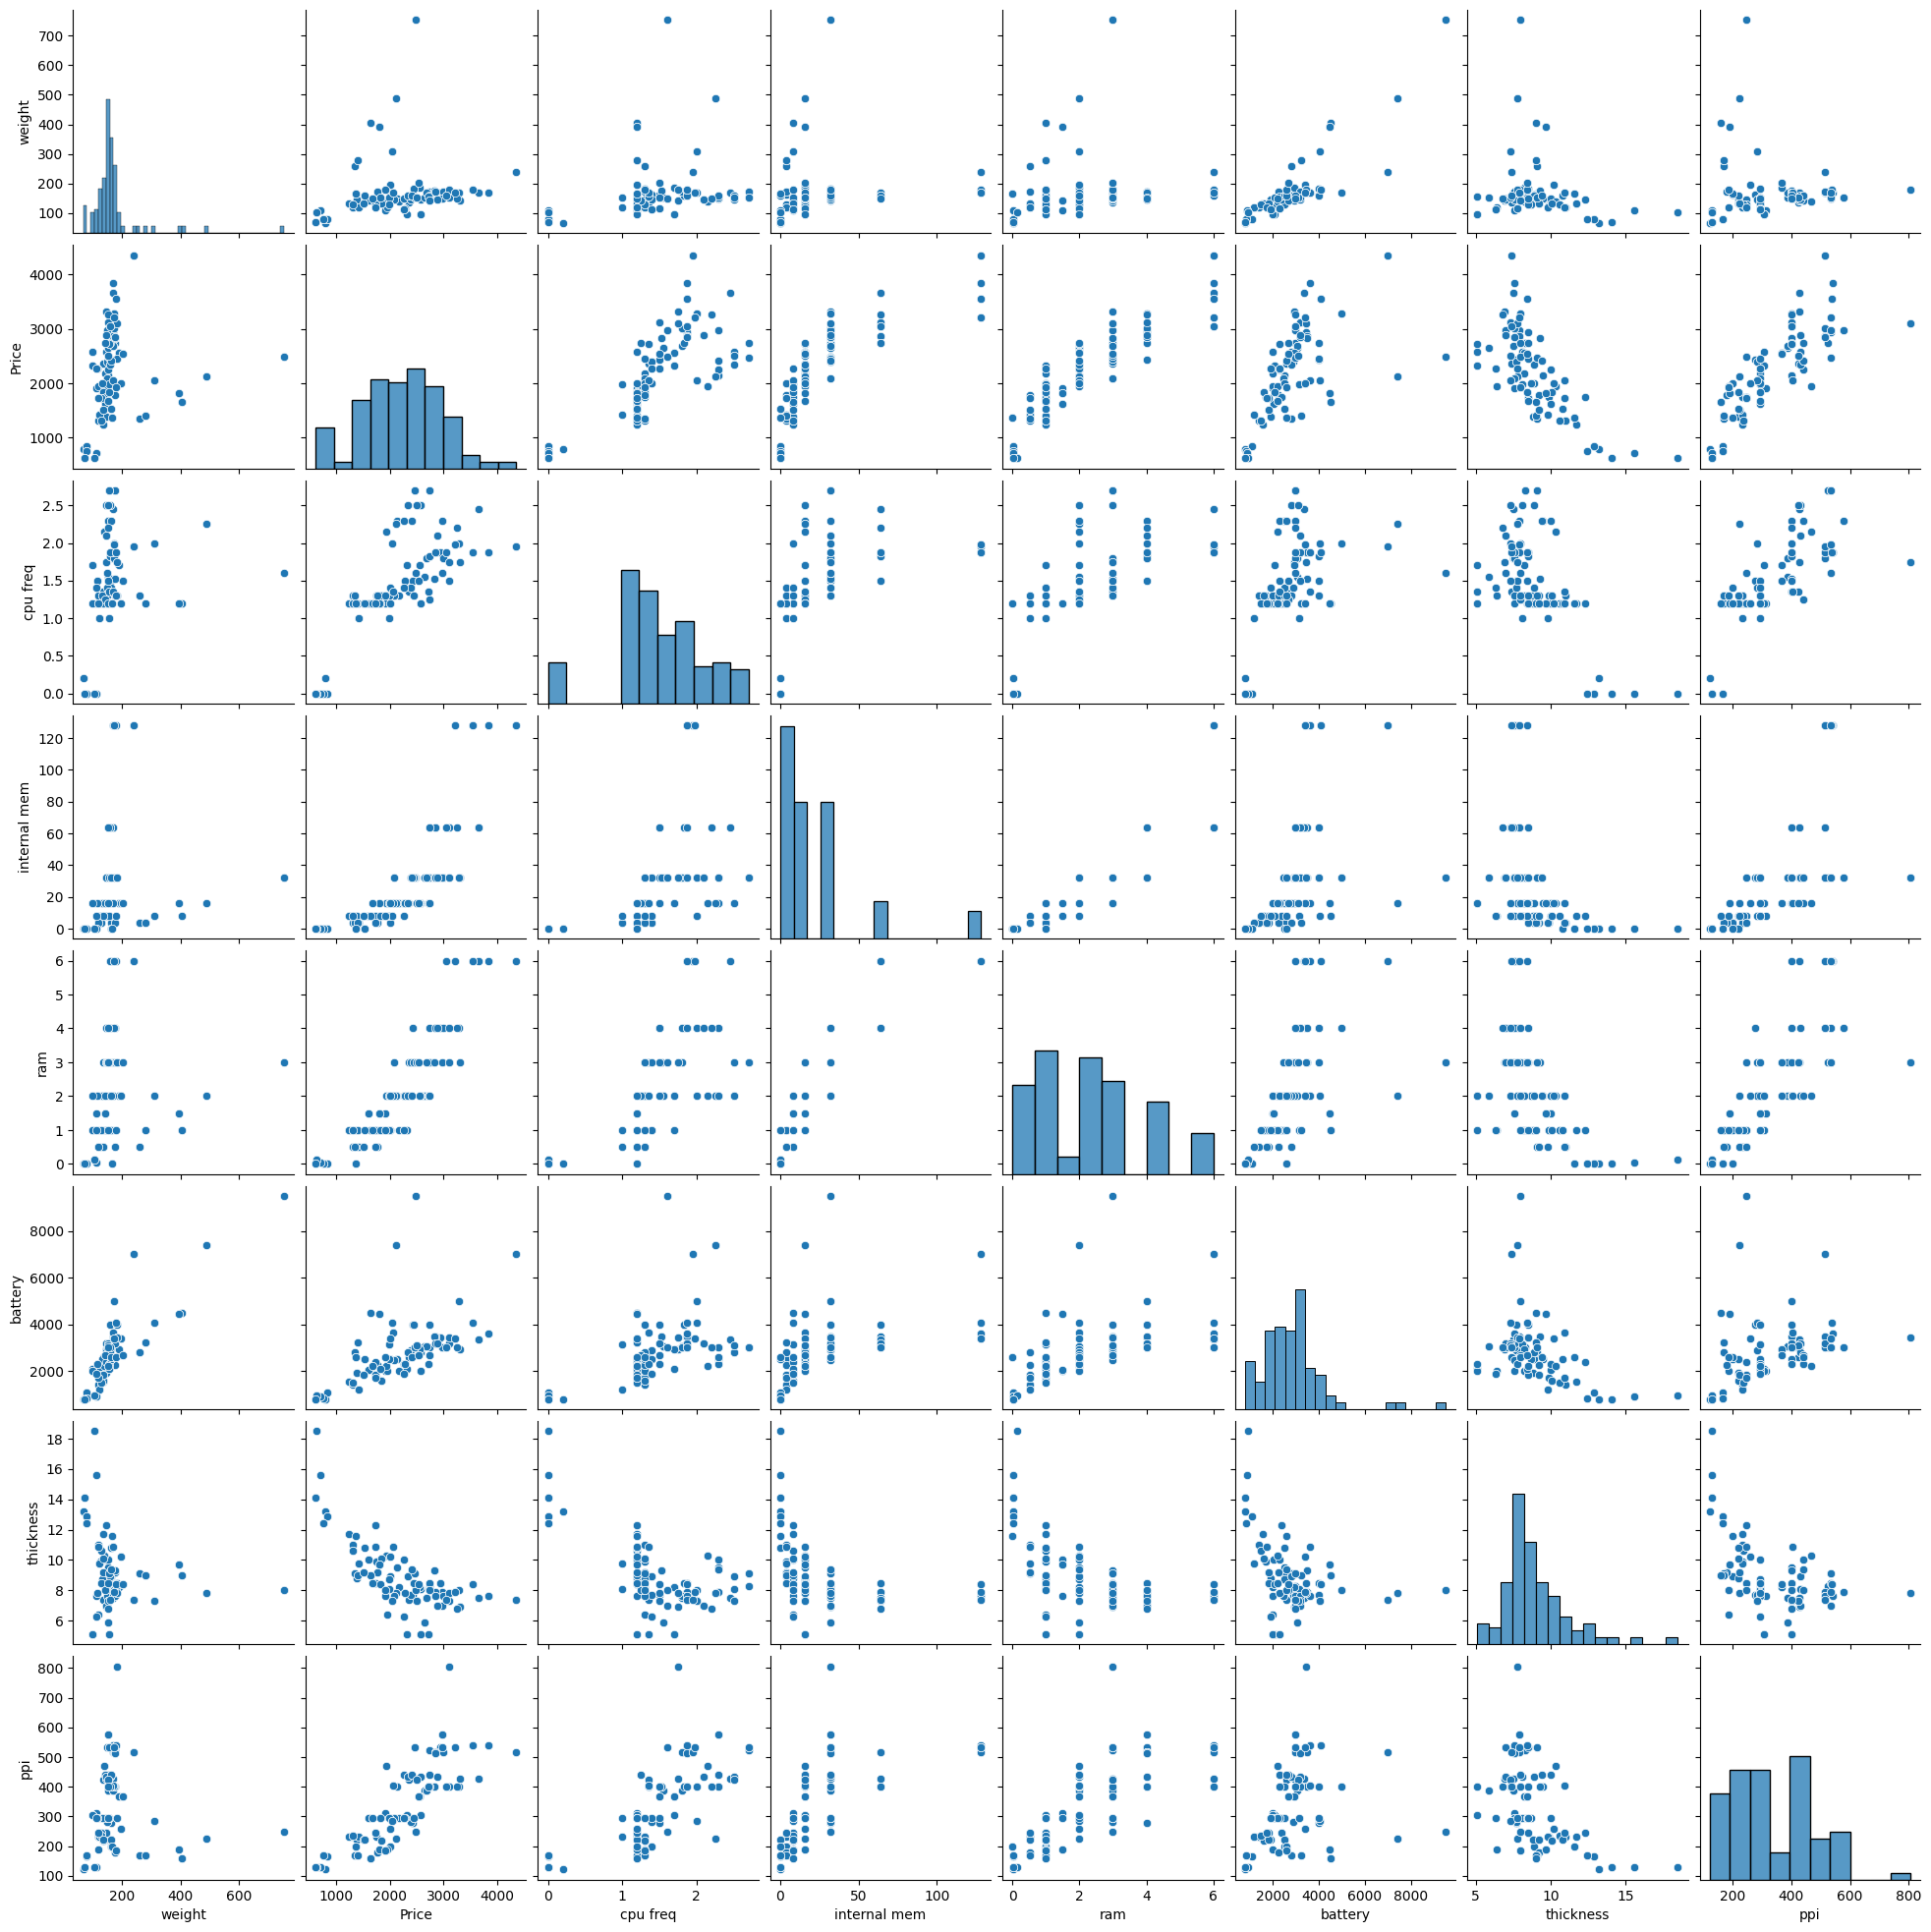

In [ ]:
sns.pairplot(CellData[["weight","Price","cpu freq","internal mem","ram","battery","thickness","ppi"]])

### Comparison

 #### Continuous Data vs Catagorical data table

The data very simlar to a heat map shows how each of the different coloumbs interact with each other in relation to the mean.

In [ ]:
# Calculating correlation matrix
ContinuousCols=["weight","Price","cpu freq","internal mem","ram","battery","thickness","ppi"]

# Creating the correlation matrix
CorrelationData=CellData[ContinuousCols].corr()
CorrelationData

,weight,Price,cpu freq,internal mem,ram,battery,thickness,ppi
weight,1.000000,0.144555,0.222730,0.098849,0.149283,0.833783,-0.185262,-0.054683
Price,0.144555,1.000000,0.727383,0.776738,0.896915,0.559946,-0.716773,0.817614
cpu freq,0.222730,0.727383,1.000000,0.441400,0.633547,0.473137,-0.614458,0.713168
internal mem,0.098849,0.776738,0.441400,1.000000,0.875354,0.461506,-0.367412,0.618560
ram,0.149283,0.896915,0.633547,0.875354,1.000000,0.541001,-0.521074,0.748724
battery,0.833783,0.559946,0.473137,0.461506,0.541001,1.000000,-0.412682,0.302517
thickness,-0.185262,-0.716773,-0.614458,-0.367412,-0.521074,-0.412682,1.000000,-0.496791
ppi,-0.054683,0.817614,0.713168,0.618560,0.748724,0.302517,-0.496791,1.000000


#### Price Correlation

This data can be useful in understanding how different features of a product relate to its price.

In [ ]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price           1.000000
cpu freq        0.727383
internal mem    0.776738
ram             0.896915
battery         0.559946
thickness      -0.716773
ppi             0.817614
Name: Price, dtype: float64

#### Continuous Data vs Catagorical data Box plot

the bollow show how the different types of contiuous data relate to the Catagorical data

<Figure size 1000x500 with 0 Axes>

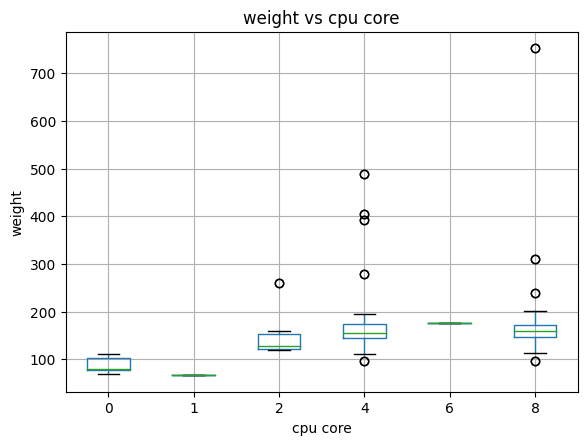

<Figure size 1000x500 with 0 Axes>

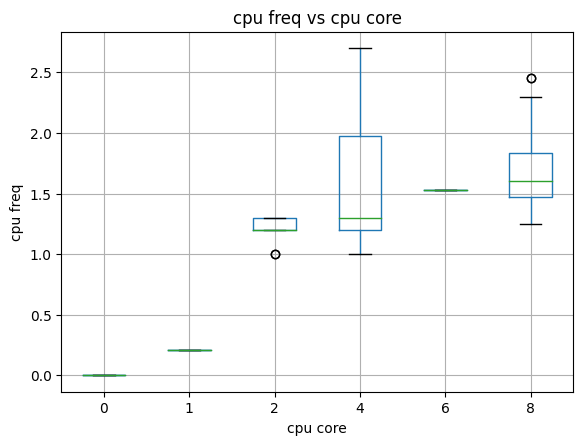

<Figure size 1000x500 with 0 Axes>

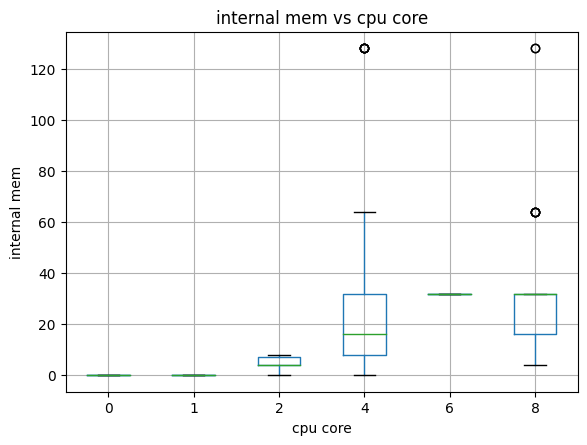

<Figure size 1000x500 with 0 Axes>

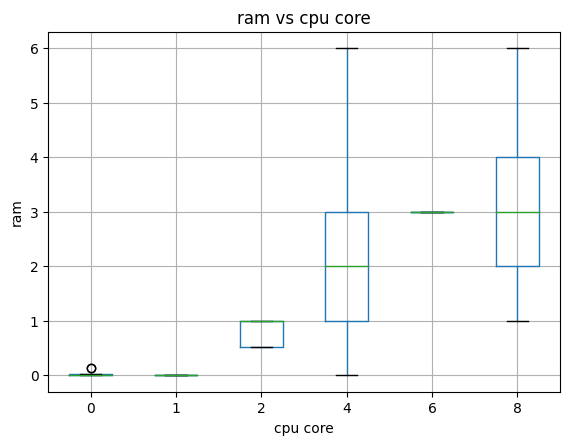

<Figure size 1000x500 with 0 Axes>

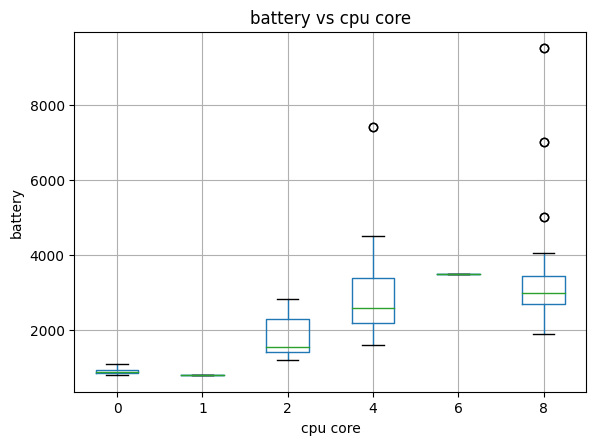

<Figure size 1000x500 with 0 Axes>

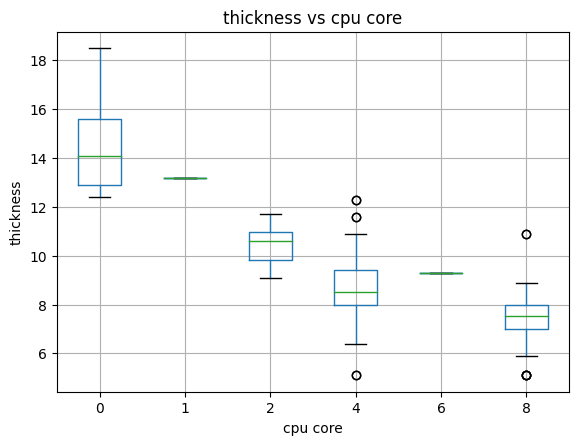

<Figure size 1000x500 with 0 Axes>

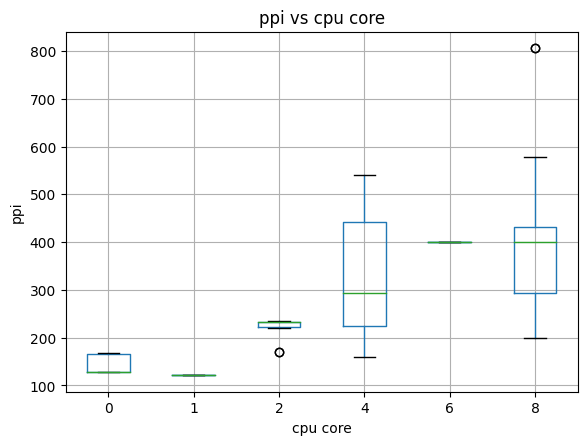

<Figure size 1000x500 with 0 Axes>

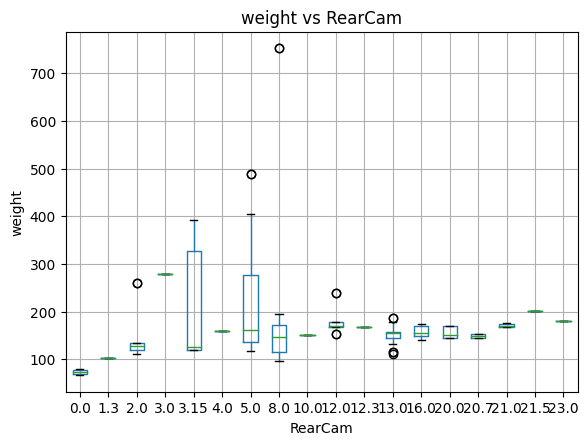

<Figure size 1000x500 with 0 Axes>

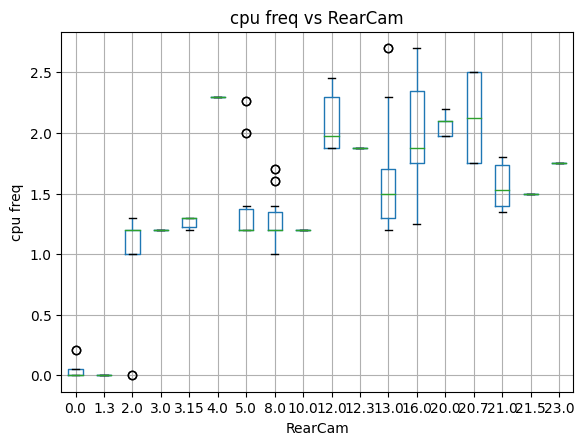

<Figure size 1000x500 with 0 Axes>

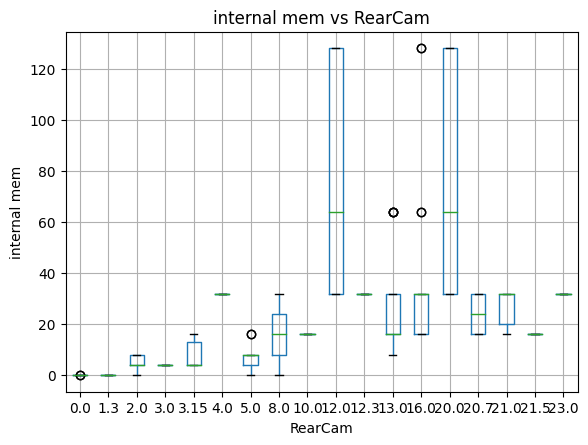

<Figure size 1000x500 with 0 Axes>

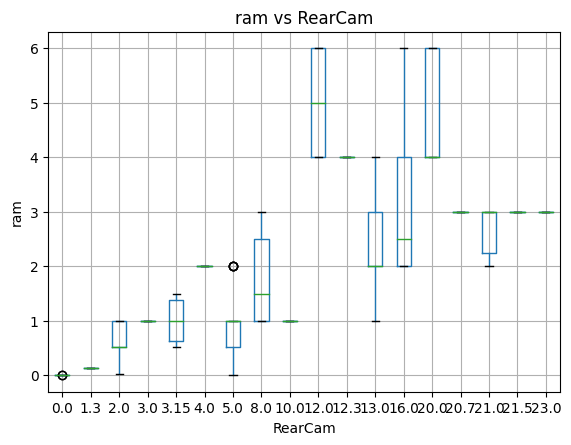

<Figure size 1000x500 with 0 Axes>

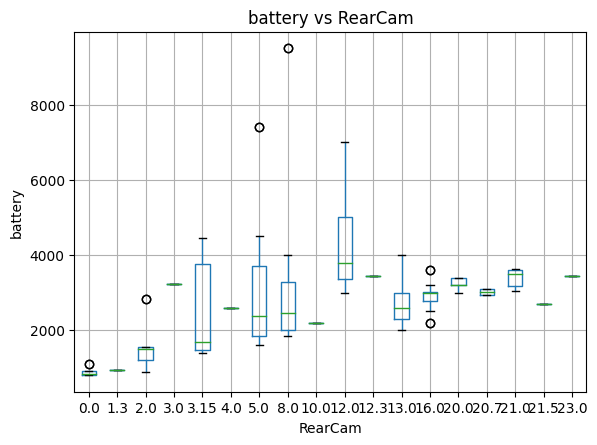

<Figure size 1000x500 with 0 Axes>

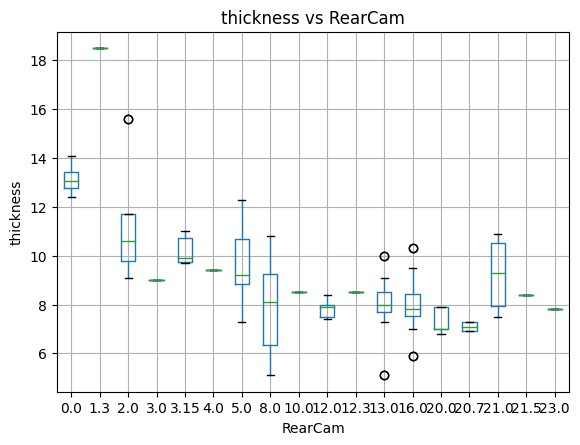

<Figure size 1000x500 with 0 Axes>

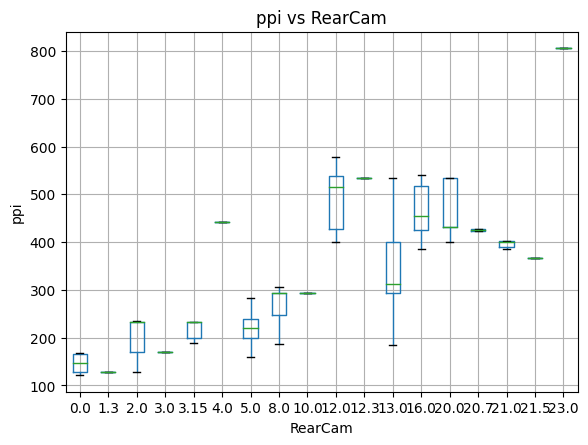

<Figure size 1000x500 with 0 Axes>

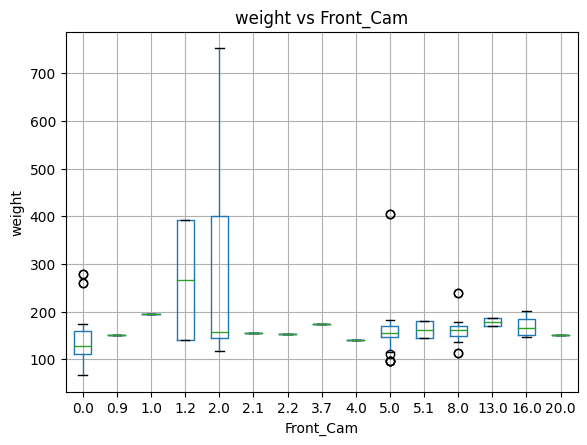

<Figure size 1000x500 with 0 Axes>

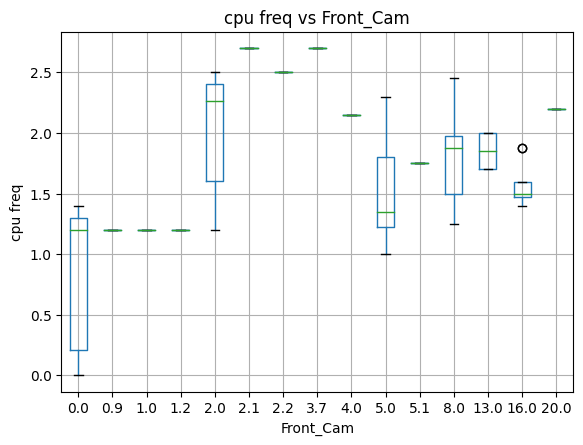

<Figure size 1000x500 with 0 Axes>

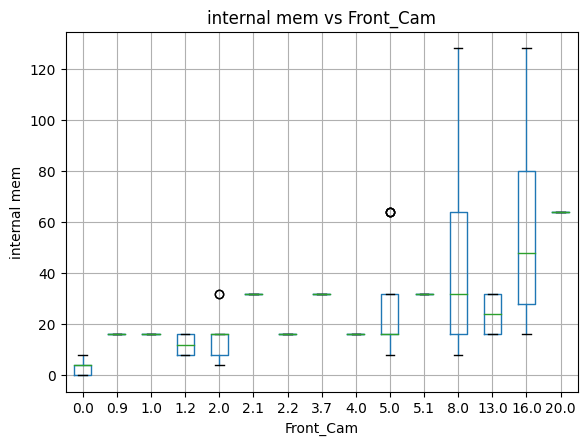

<Figure size 1000x500 with 0 Axes>

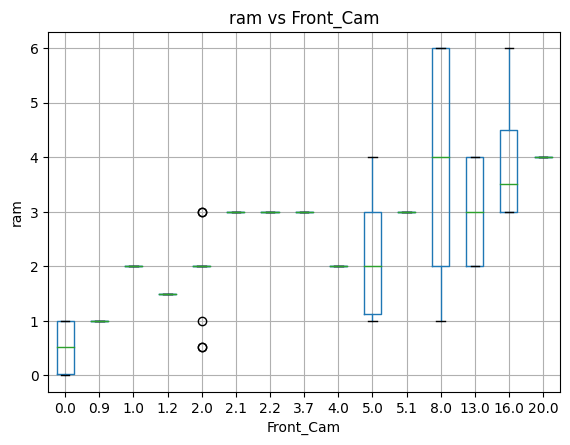

<Figure size 1000x500 with 0 Axes>

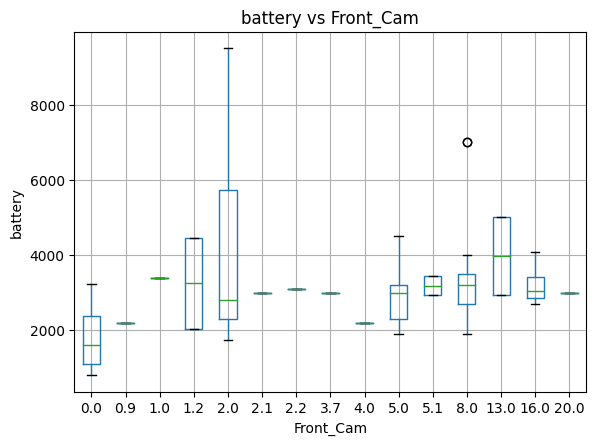

<Figure size 1000x500 with 0 Axes>

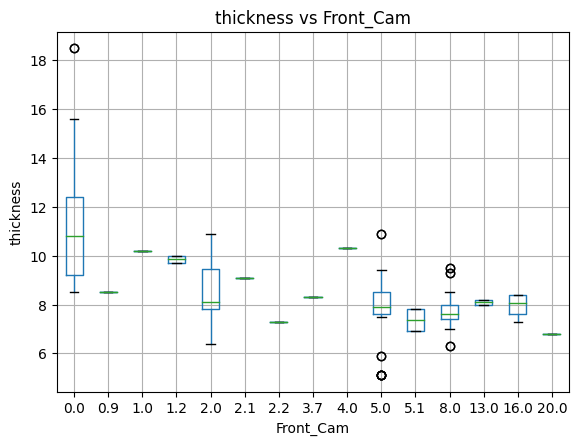

<Figure size 1000x500 with 0 Axes>

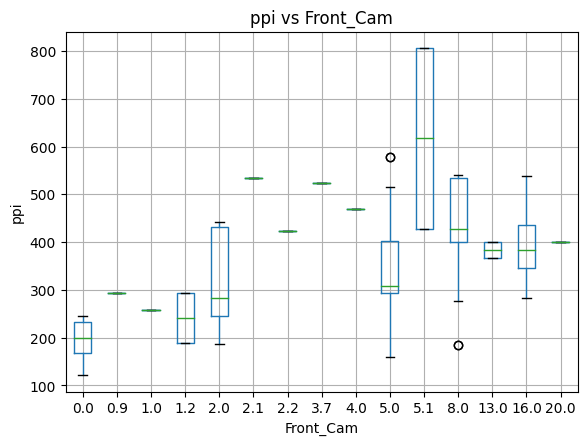

<Figure size 1000x500 with 0 Axes>

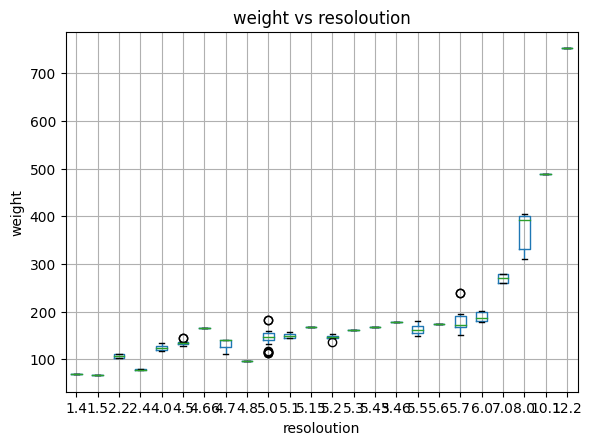

<Figure size 1000x500 with 0 Axes>

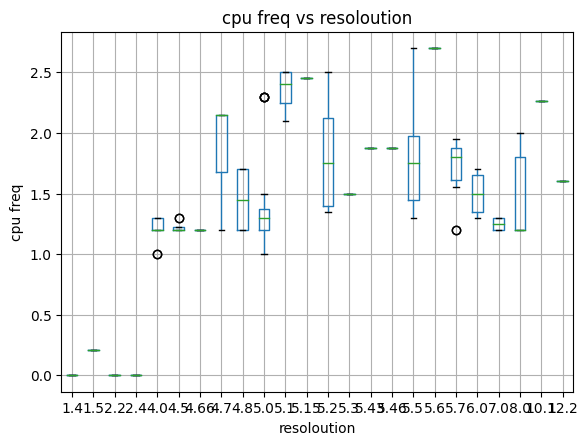

<Figure size 1000x500 with 0 Axes>

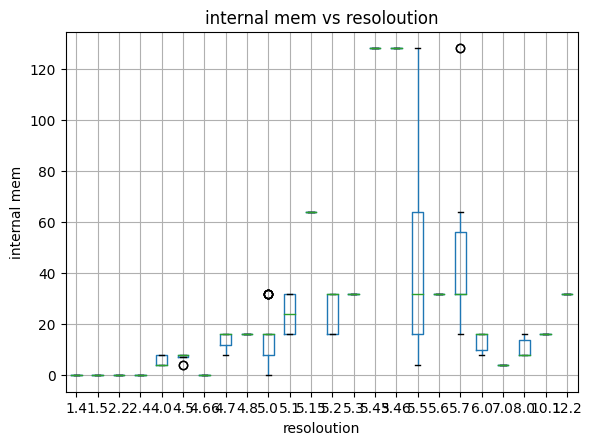

<Figure size 1000x500 with 0 Axes>

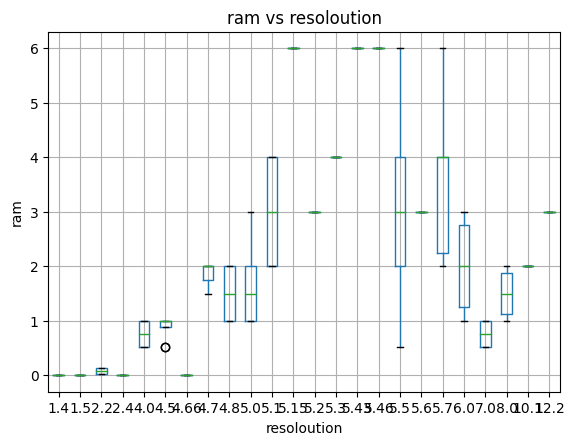

<Figure size 1000x500 with 0 Axes>

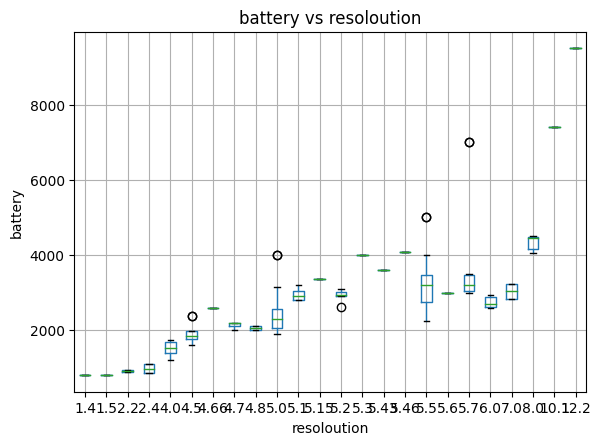

<Figure size 1000x500 with 0 Axes>

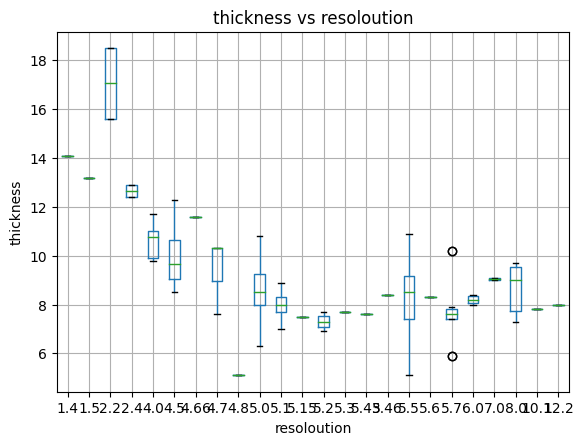

<Figure size 1000x500 with 0 Axes>

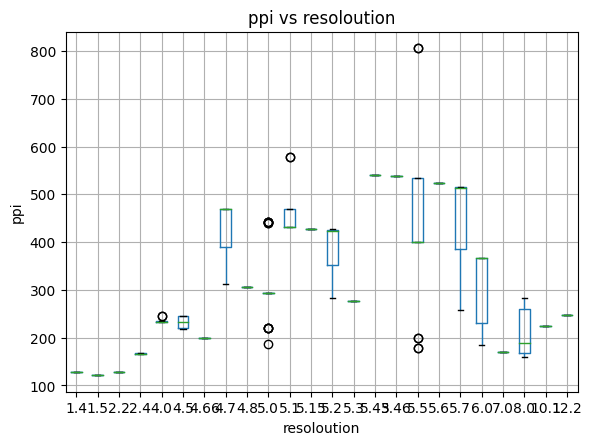

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'CellData' is your DataFrame and it's already loaded with data.

# List of continuous variables
ContinuousVars = ["weight", "cpu freq", "internal mem", "ram", "battery", "thickness", "ppi"]

# List of categorical variables
CategoricalVars = ['cpu core', 'RearCam', 'Front_Cam', 'resoloution']

# Plotting boxplot for each continuous variable vs each categorical variable
for categorical in CategoricalVars:
    for continuous in ContinuousVars:
        plt.figure(figsize=(10,5))
        CellData.boxplot(column=continuous, by=categorical)
        plt.title(f'{continuous} vs {categorical}')
        plt.suptitle('')  # Suppress the default title to avoid overlapping with the title we set
        plt.xlabel(categorical)
        plt.ylabel(continuous)
        plt.show()


####Everything vs Price

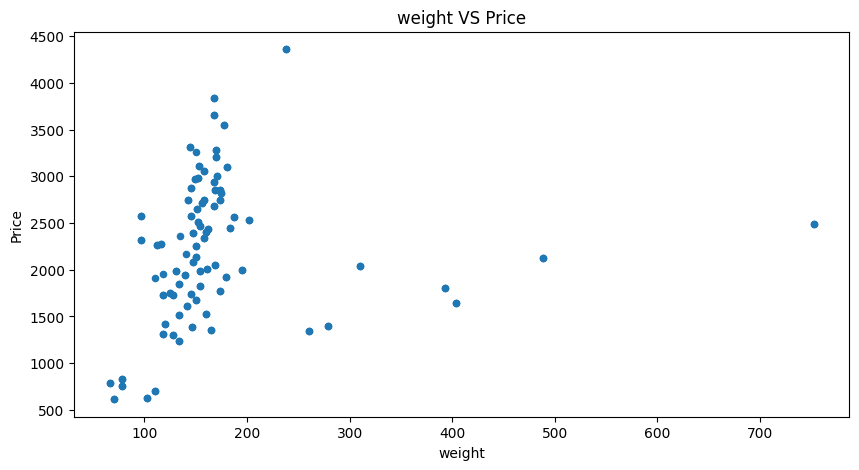

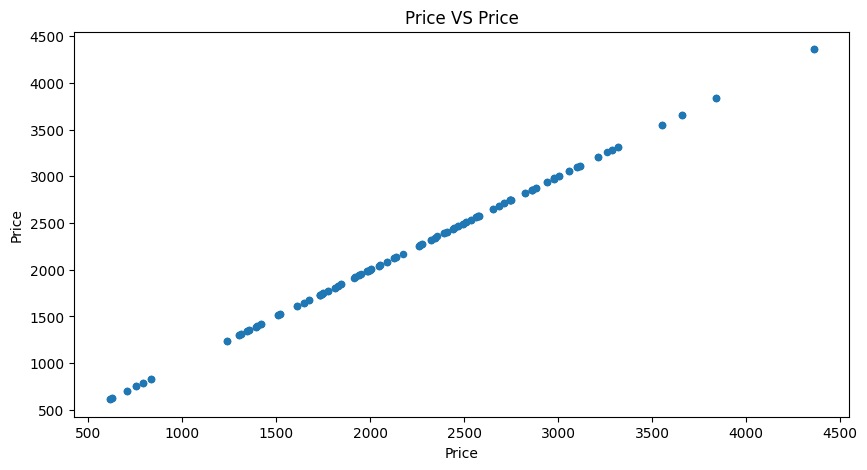

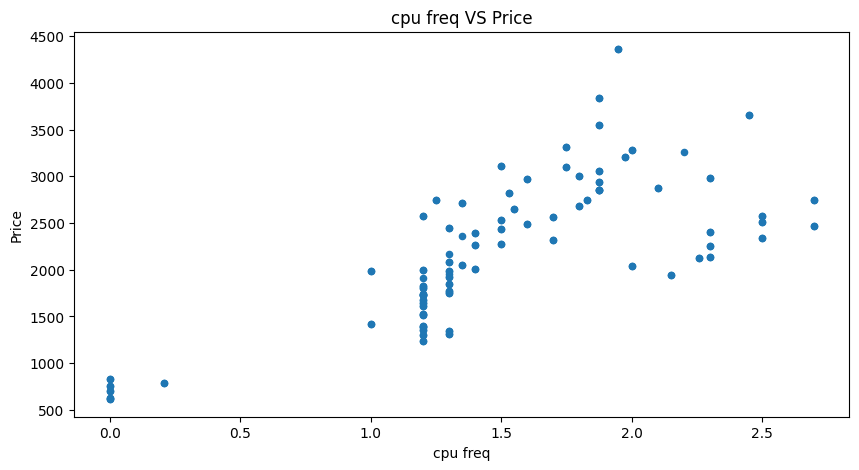

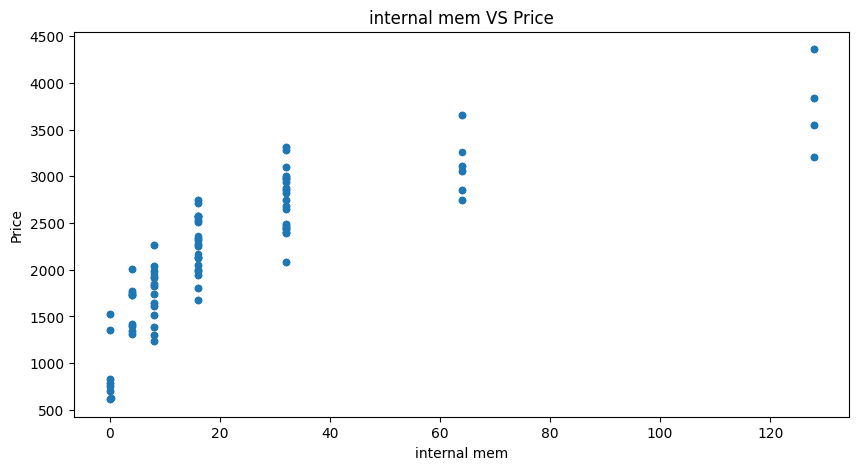

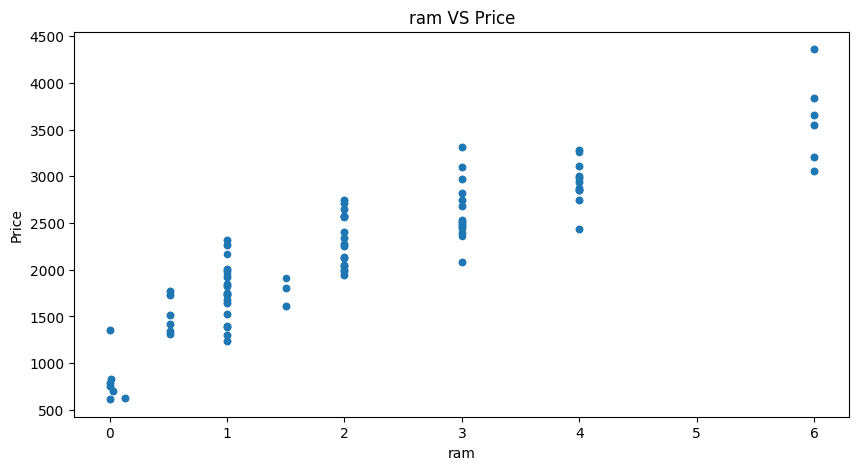

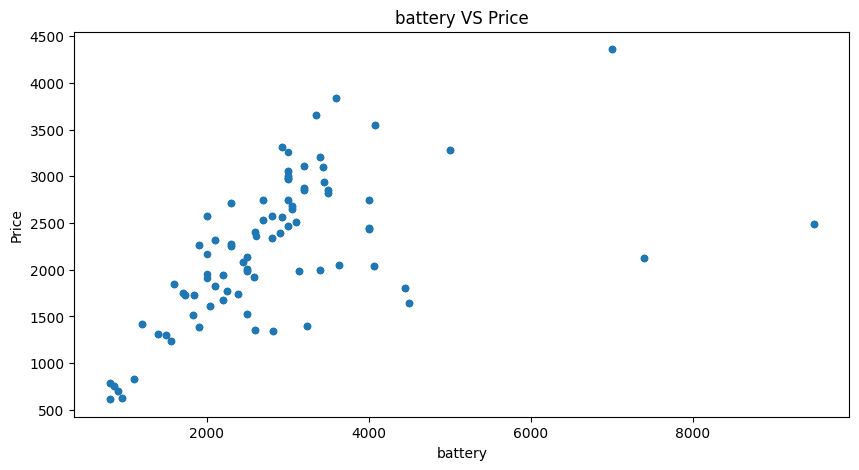

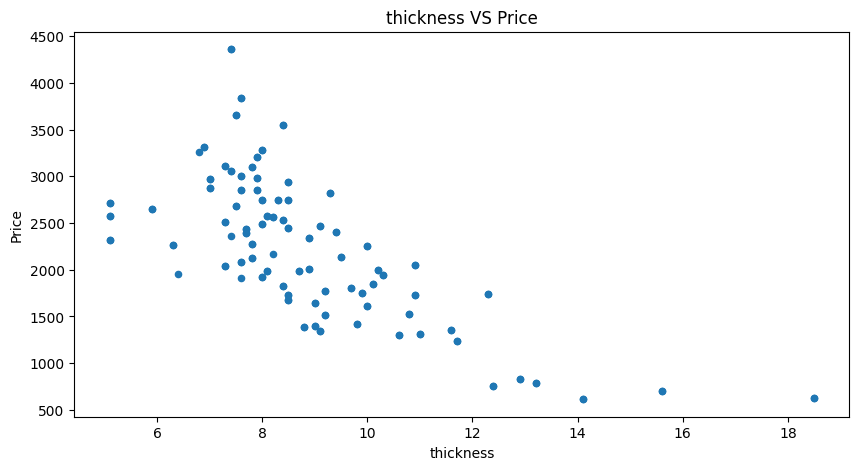

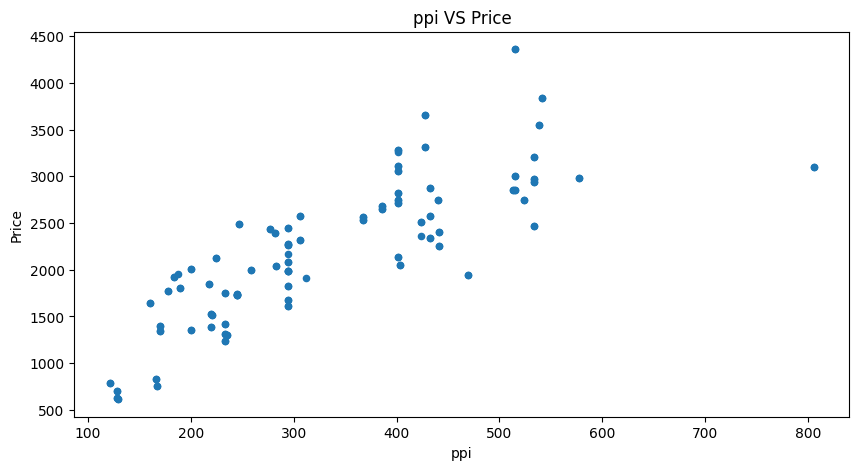

In [ ]:
ContinuousCols=["weight","Price","cpu freq","internal mem","ram","battery","thickness","ppi"]

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CellData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

### Outlier

#### identifying the outliers

to wright the following code understand how means and interquartile range ( measure of statistical dispersion) works.

Sort the Data: Arrange the data in ascending order.

Find the Quartiles:

- Q1 (First Quartile): The median of the lower half of the dataset (not including the median if the number of data points is odd).

- Q3 (Third Quartile): The median of the upper half of the dataset.
Calculate

IQR: Subtract Q1 from Q3:

IQR =𝑄3−𝑄1

https://www.calculator.io/quartile-calculator/

this is the formula that has been worked into the code and allows for the removal of outliers that may impact the AI/Mechine learning model

In [ ]:
def detect_outlier():
  for i in CellData:
    print('========================',i,'================================')
    q1,q2=np.percentile(CellData[i],[25,75])
    iqr=q2-q1
    print('25%, 75%:   ',q1,', ',q2)
    lower_bound=q1-(1.5*iqr)
    upper_bound=q2+(1.5*iqr)
    print('lower_bound, upper_bound:   ',lower_bound,', ',upper_bound)
    out=CellData[(CellData[i]<lower_bound) | (CellData[i]>upper_bound)]
    print('outliers_val: ',out[i].to_list())
    print('Total Outlier: ',round((len(out)/len(CellData))*100,2),'%')


detect_outlier()

======================== Product_id ================================
25%, 75%:    237.0 ,  1026.0
lower_bound, upper_bound:    -946.5 ,  2209.5
outliers_val:  []
Total Outlier:  0.0 %
======================== Price ================================
25%, 75%:    1734.0 ,  2744.0
lower_bound, upper_bound:    219.0 ,  4259.0
outliers_val:  [4361, 4361]
Total Outlier:  1.24 %
======================== Sale ================================
25%, 75%:    37.0 ,  382.0
lower_bound, upper_bound:    -480.5 ,  899.5
outliers_val:  [996, 1009, 1043, 1224, 1274, 1530, 1584, 1781, 1862, 2071, 2088, 2106, 2159, 2171, 2173, 3248, 3291, 3619, 4408, 4638, 8016, 8809, 8946, 9807]
Total Outlier:  14.91 %
======================== weight ================================
25%, 75%:    134.1 ,  170.0
lower_bound, upper_bound:    80.24999999999999 ,  223.85000000000002
outliers_val:  [489.0, 489.0, 260.0, 260.0, 310.0, 310.0, 279.0, 66.0, 404.0, 279.0, 66.0, 404.0, 393.0, 393.0, 78.4, 78.4, 77.9, 77.9, 753.0, 753

This function above calculates the Interquartile Range (IQR) for each column in the dataset, defines bounds for what would be considered an outlier (1.5 times the IQR below the first quartile or above the third quartile) pulled from the formula above, and then identifies and prints out the outliers & percentage of total outliers.


the function
`
np.percentile
`
 is used to compute the nth percentile of the given data (array elements) along the specified axis.

 https://www.geeksforgeeks.org/numpy-percentile-in-python/


#### Removal and Comparison of Outlires

the follow is calling on the above and create veriables to call on to compare the orgian and capped data. then creates graphs to show the comparison

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
def cap_outliers(series, width=1.5):
    """Caps outliers in a pandas series based on IQR and returns the modified series."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + width * iqr
    return series.clip(upper=upper_bound)

In [ ]:
def plot_boxplots_and_histograms(data, column):
    """Plots boxplots and histograms for original and outlier-capped data of a given column."""
    data_modified = data.copy()
    data_modified[column] = cap_outliers(data_modified[column])

    plt.figure(figsize=(12, 12))

    # Plot original data boxplot
    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[column])
    plt.title('Boxplot Before Outlier Replacement')

    # Plot modified data boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=data_modified[column])
    plt.title('Boxplot After Outlier Replacement')

    # Plot original data histogram
    plt.subplot(2, 2, 3)
    plt.hist(data[column], bins=30, alpha=0.7, color='blue')
    plt.title('Histogram Before Outlier Replacement')

    # Plot modified data histogram
    plt.subplot(2, 2, 4)
    plt.hist(data_modified[column], bins=30, alpha=0.7, color='green')
    plt.title('Histogram After Outlier Replacement')

    plt.tight_layout()
    plt.show()


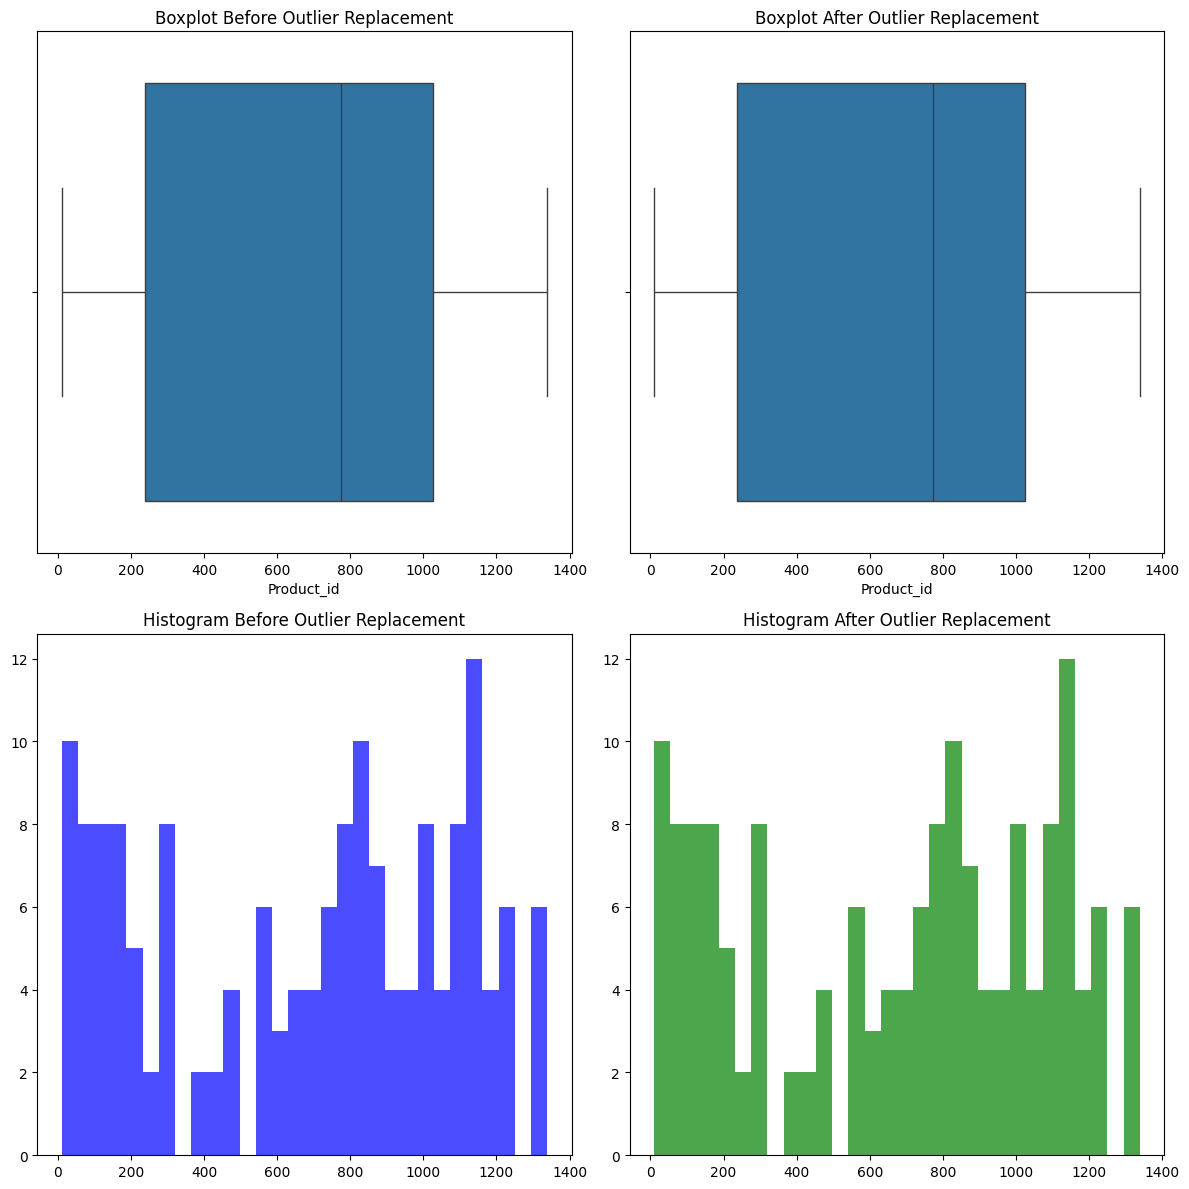

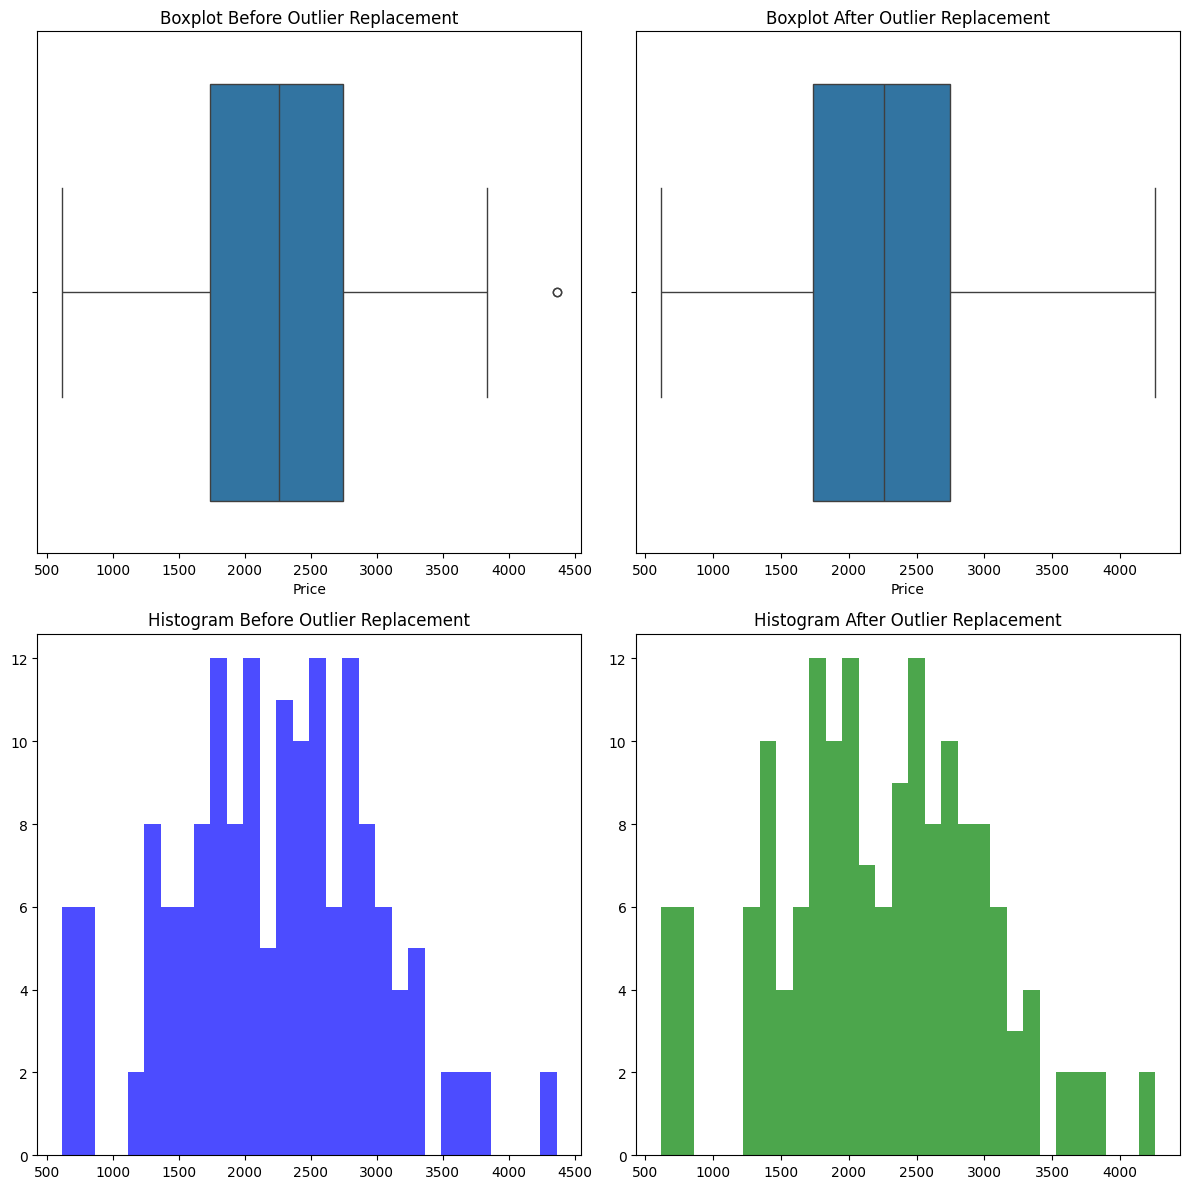

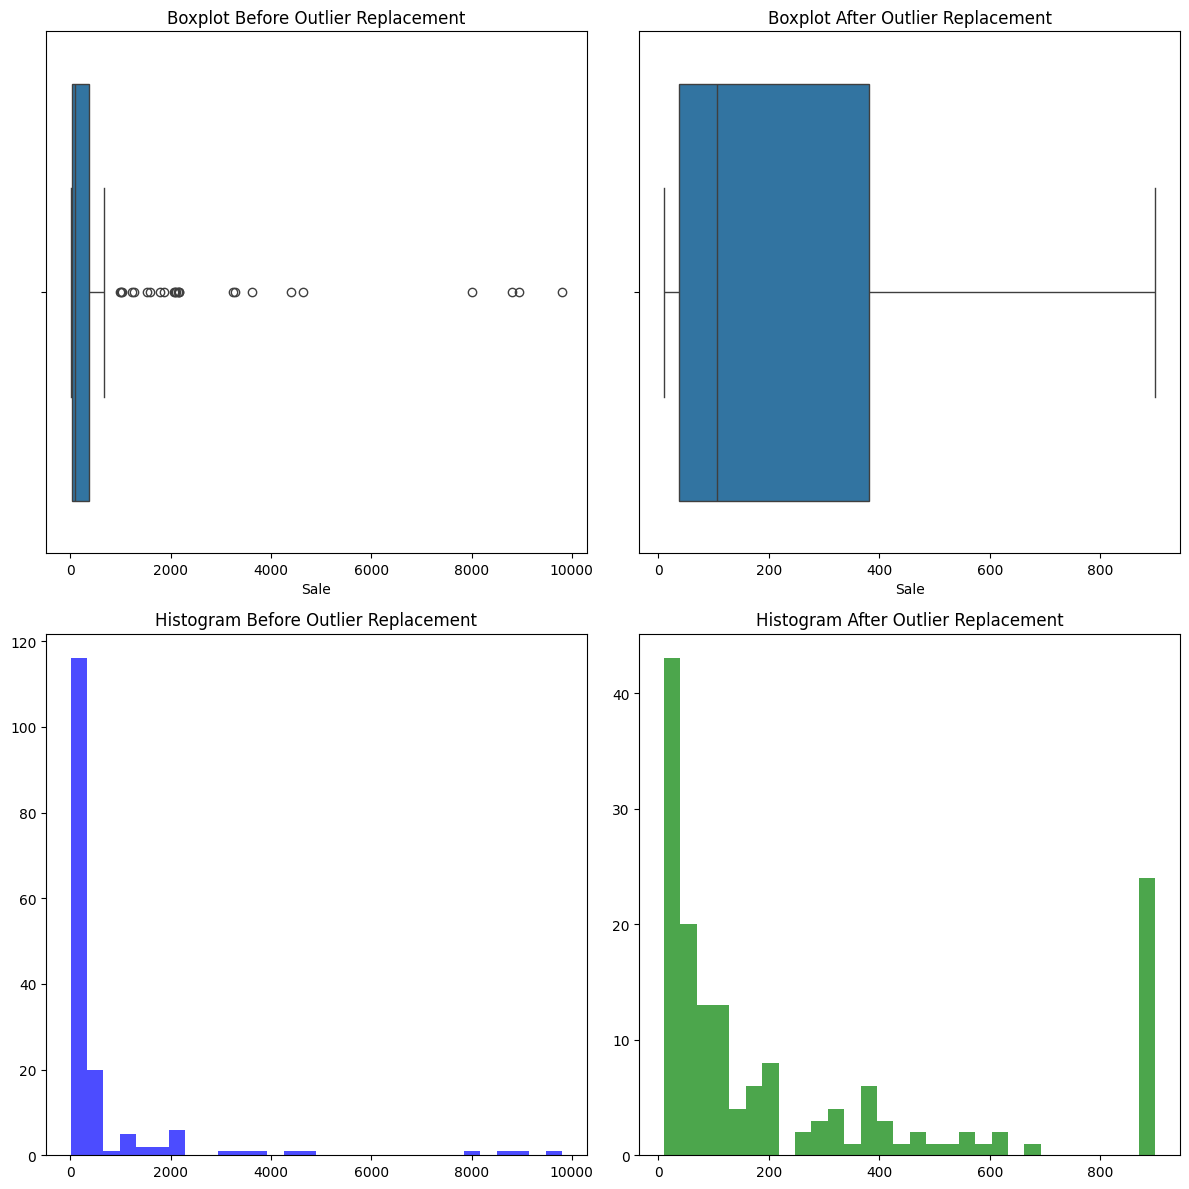

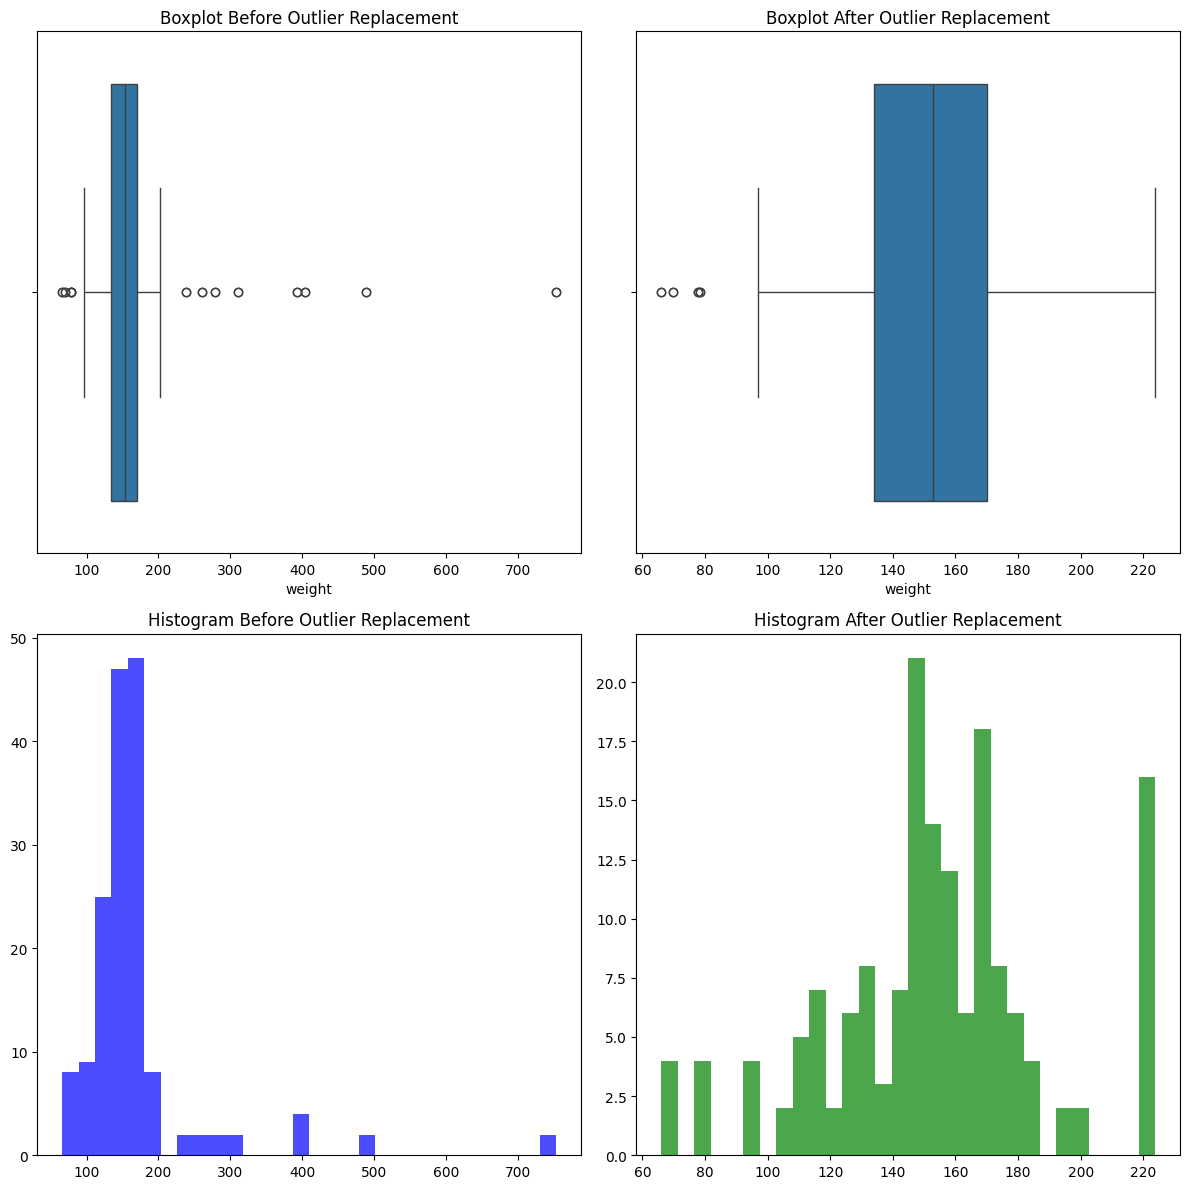

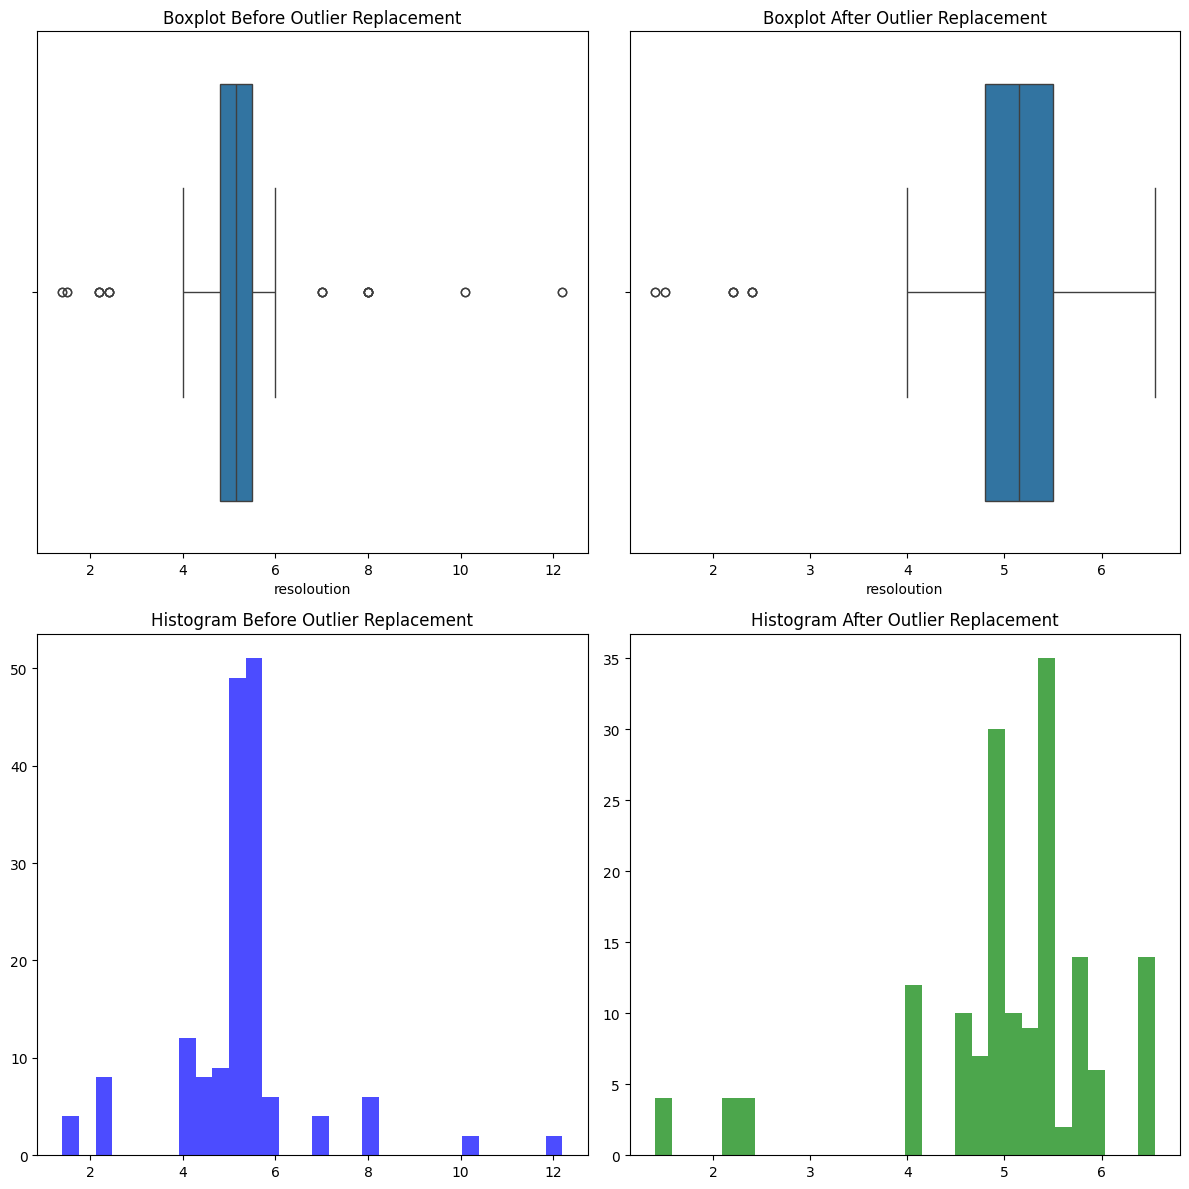

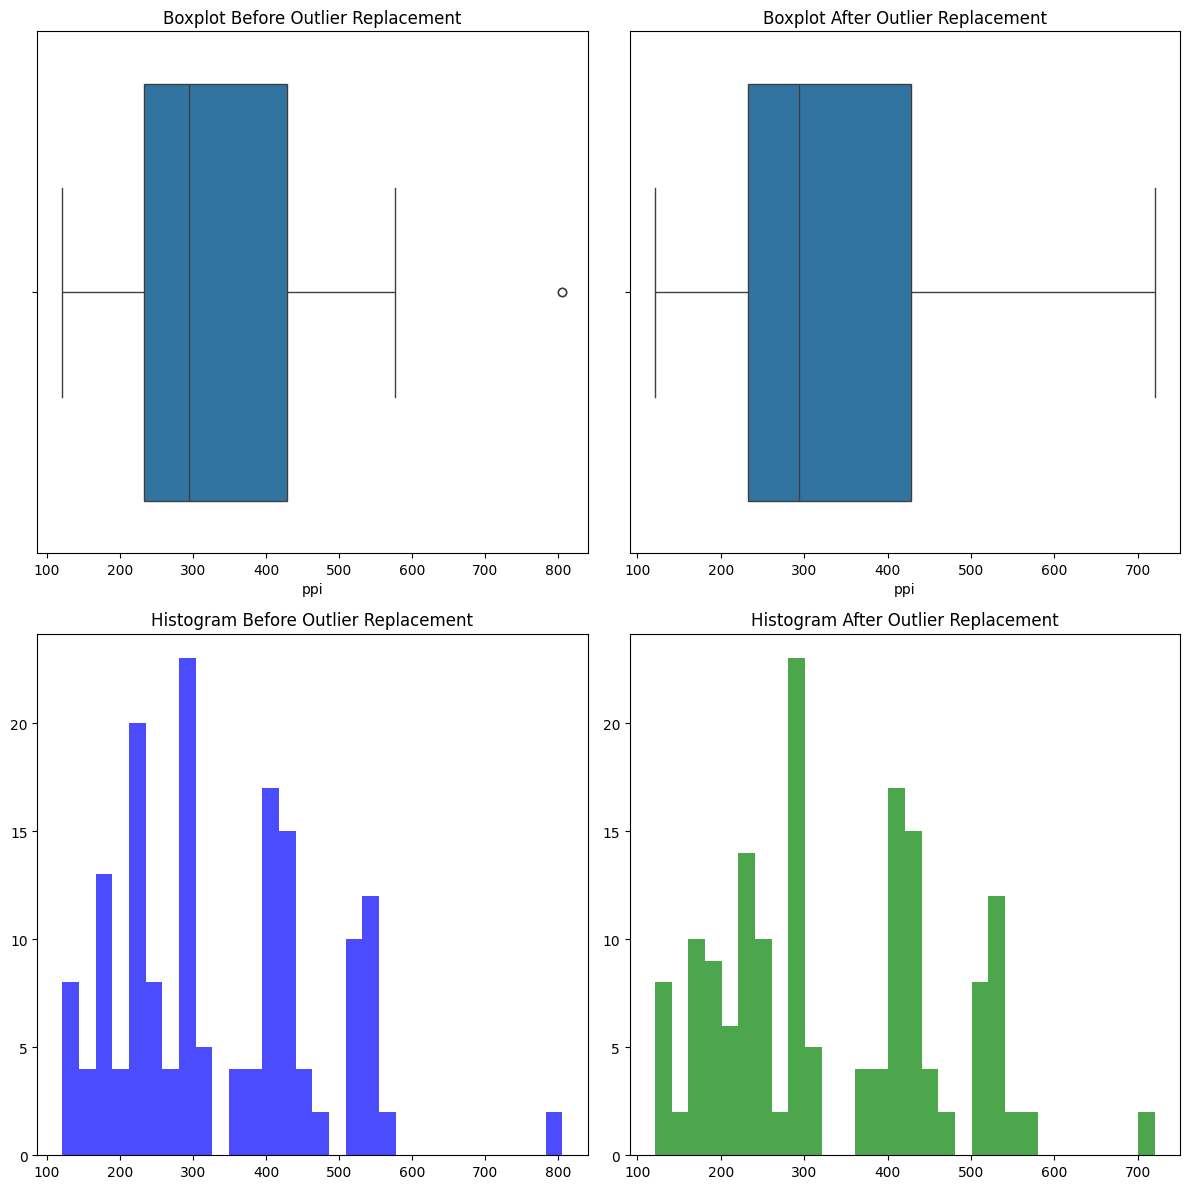

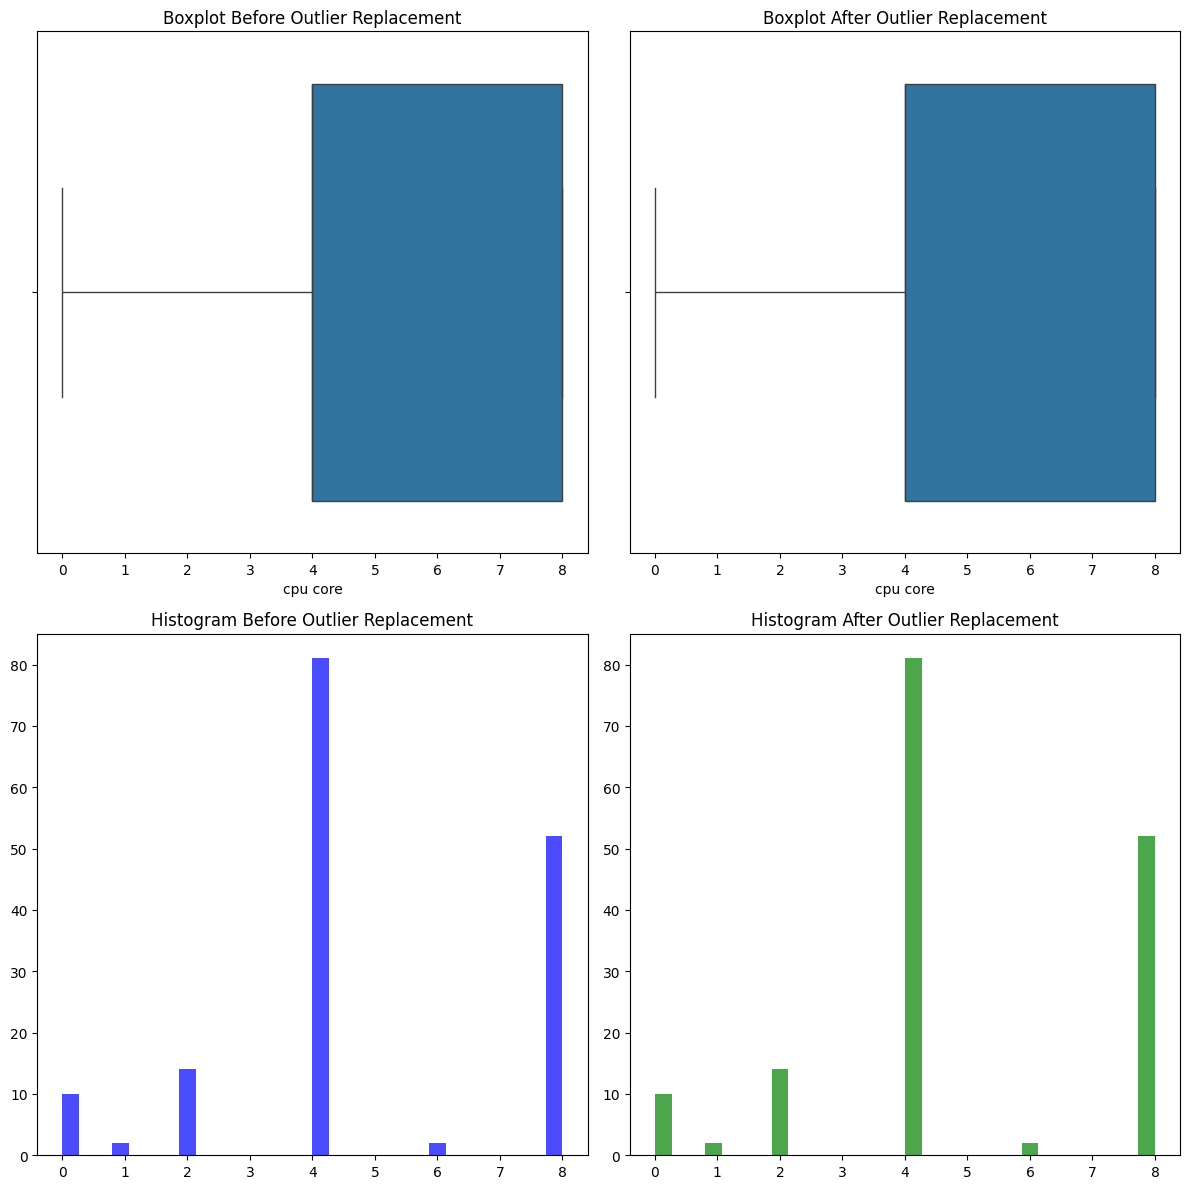

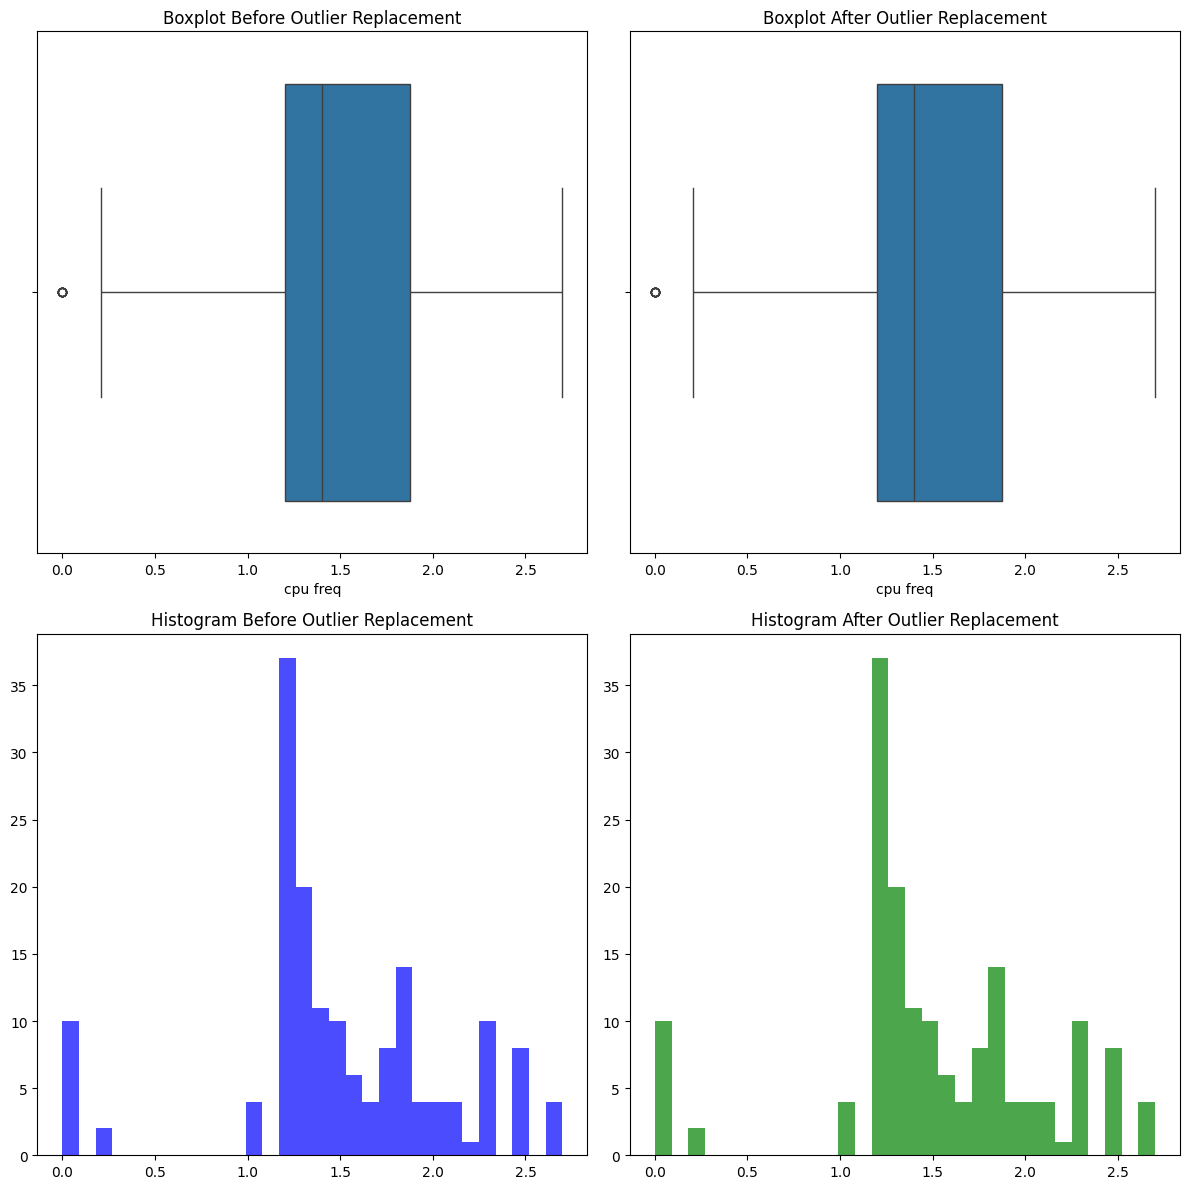

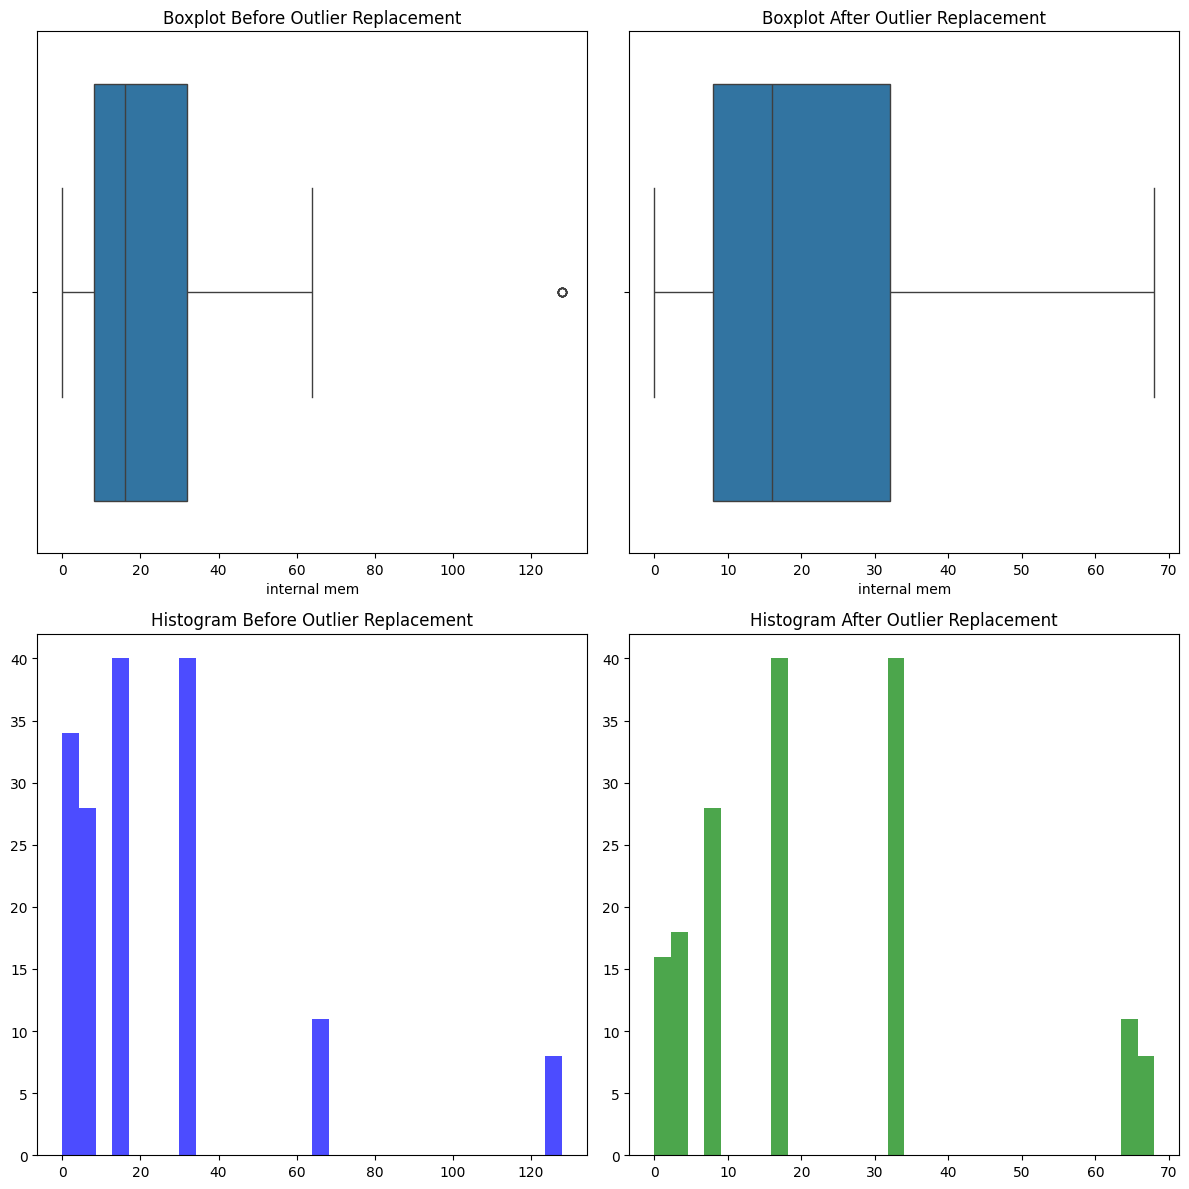

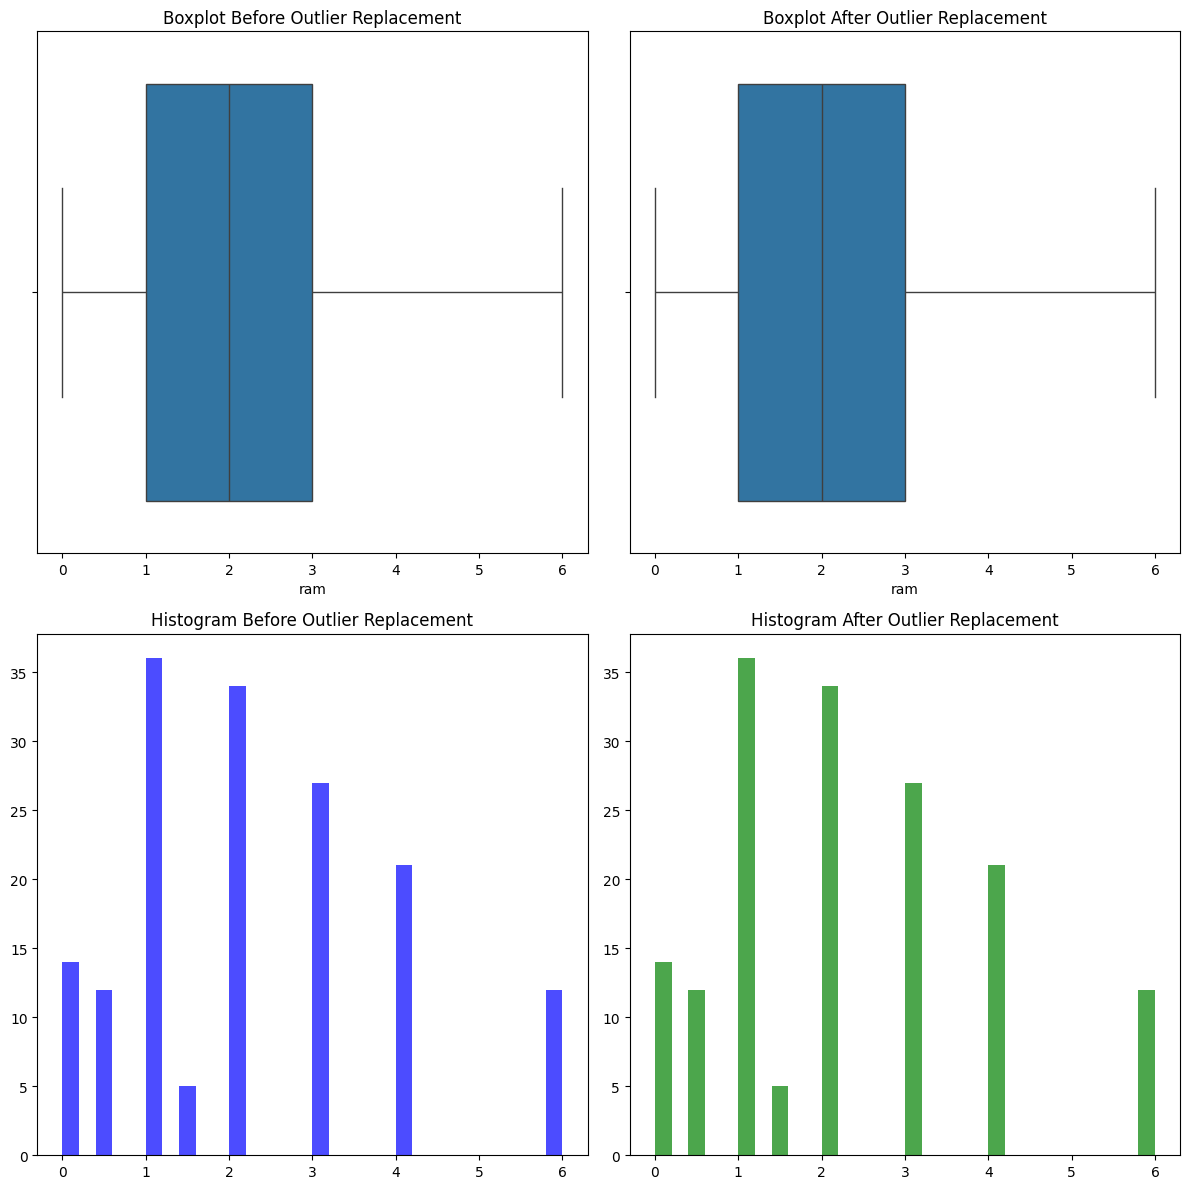

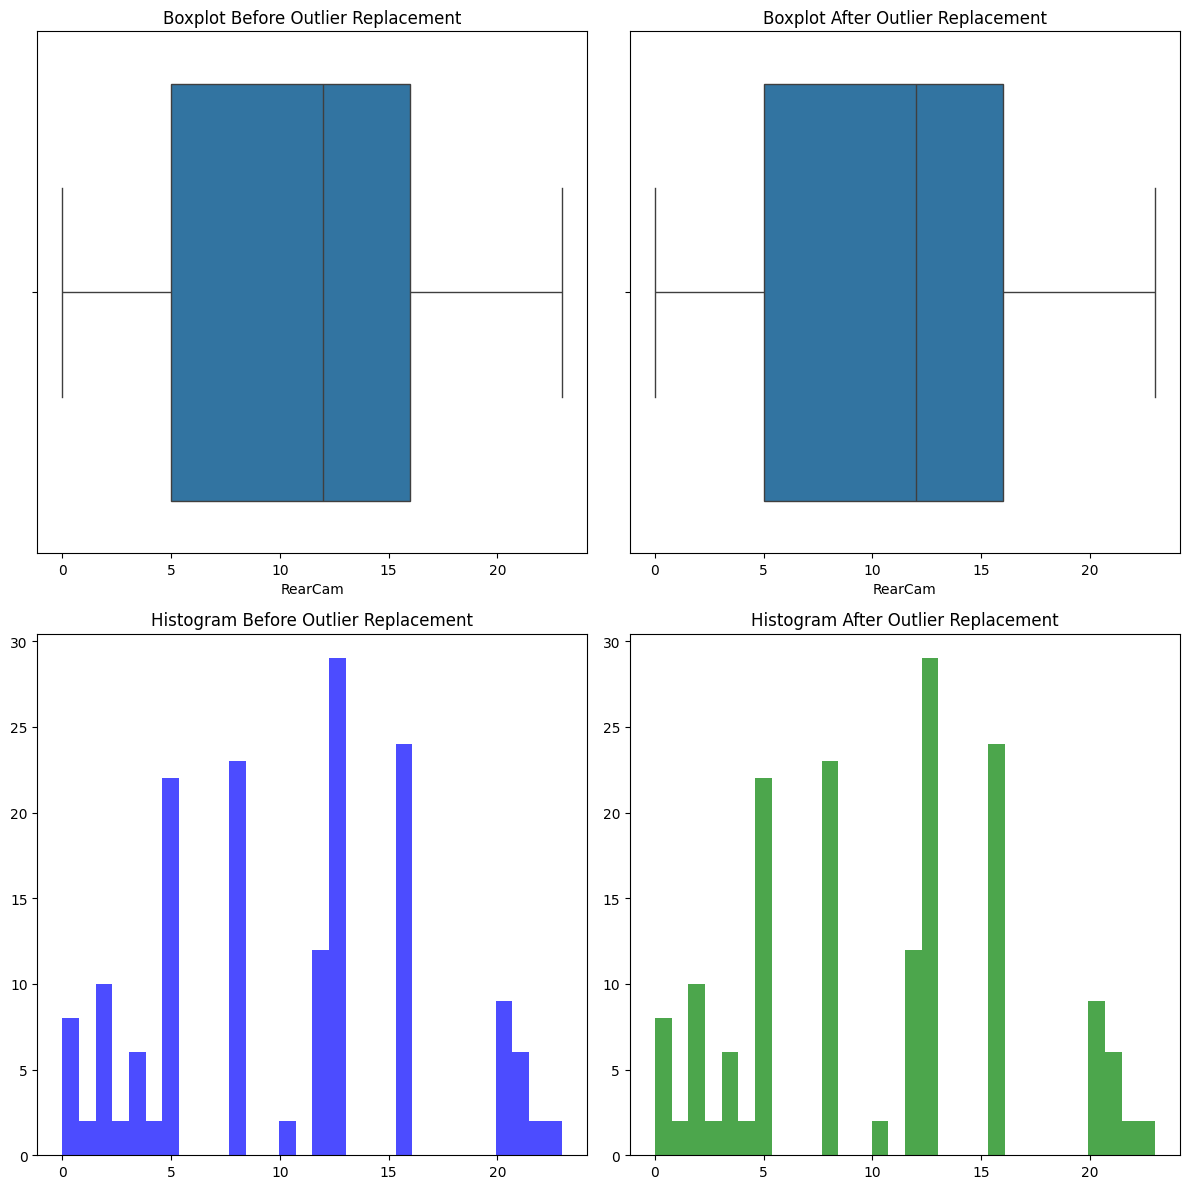

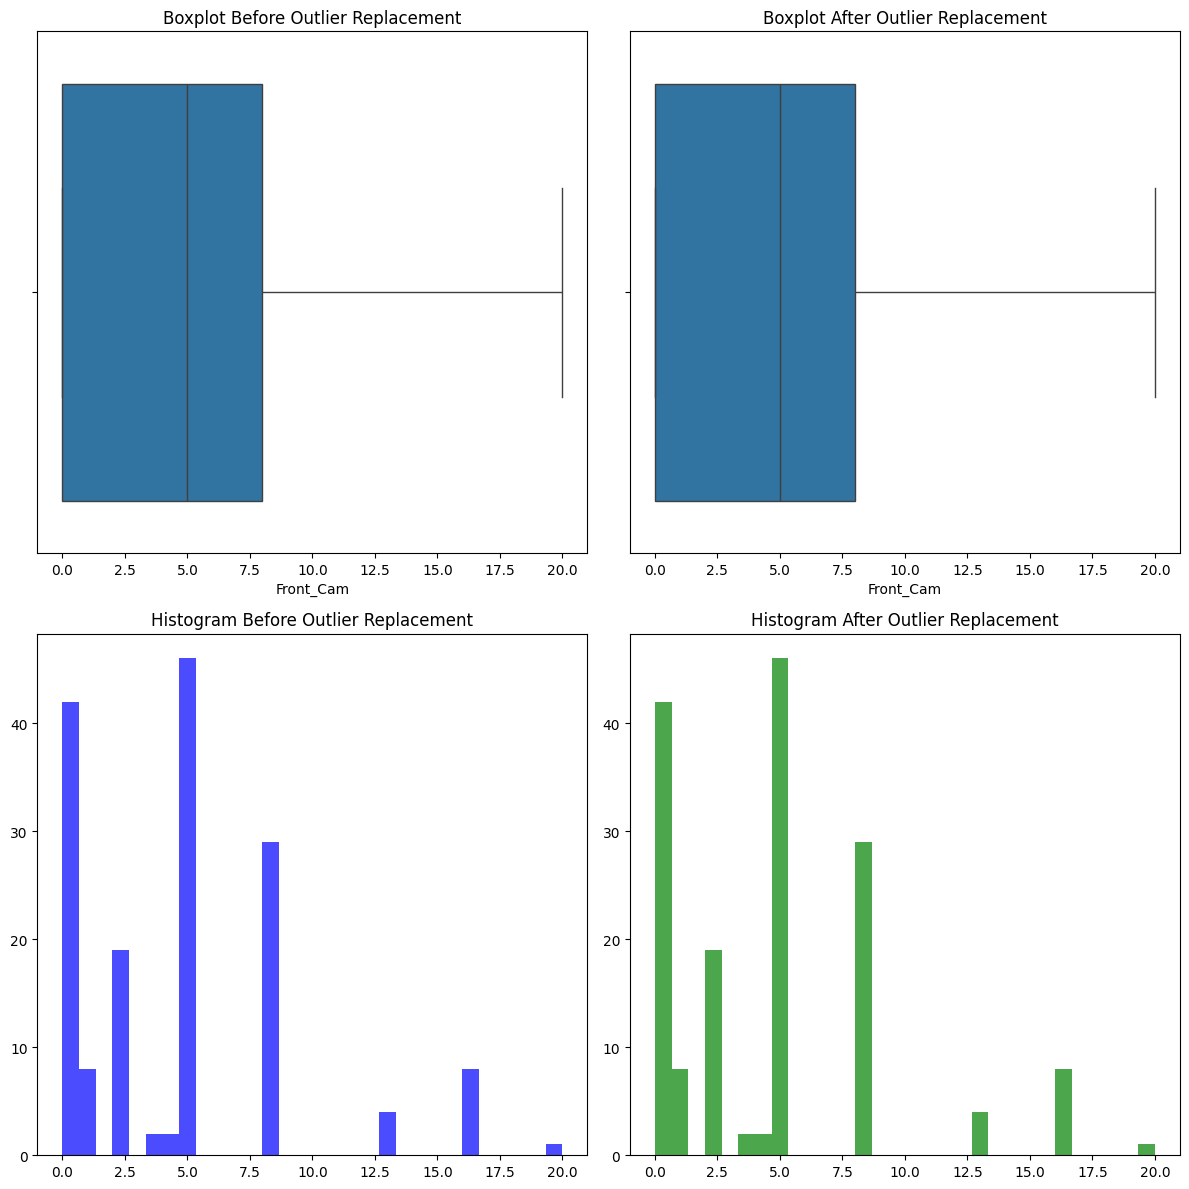

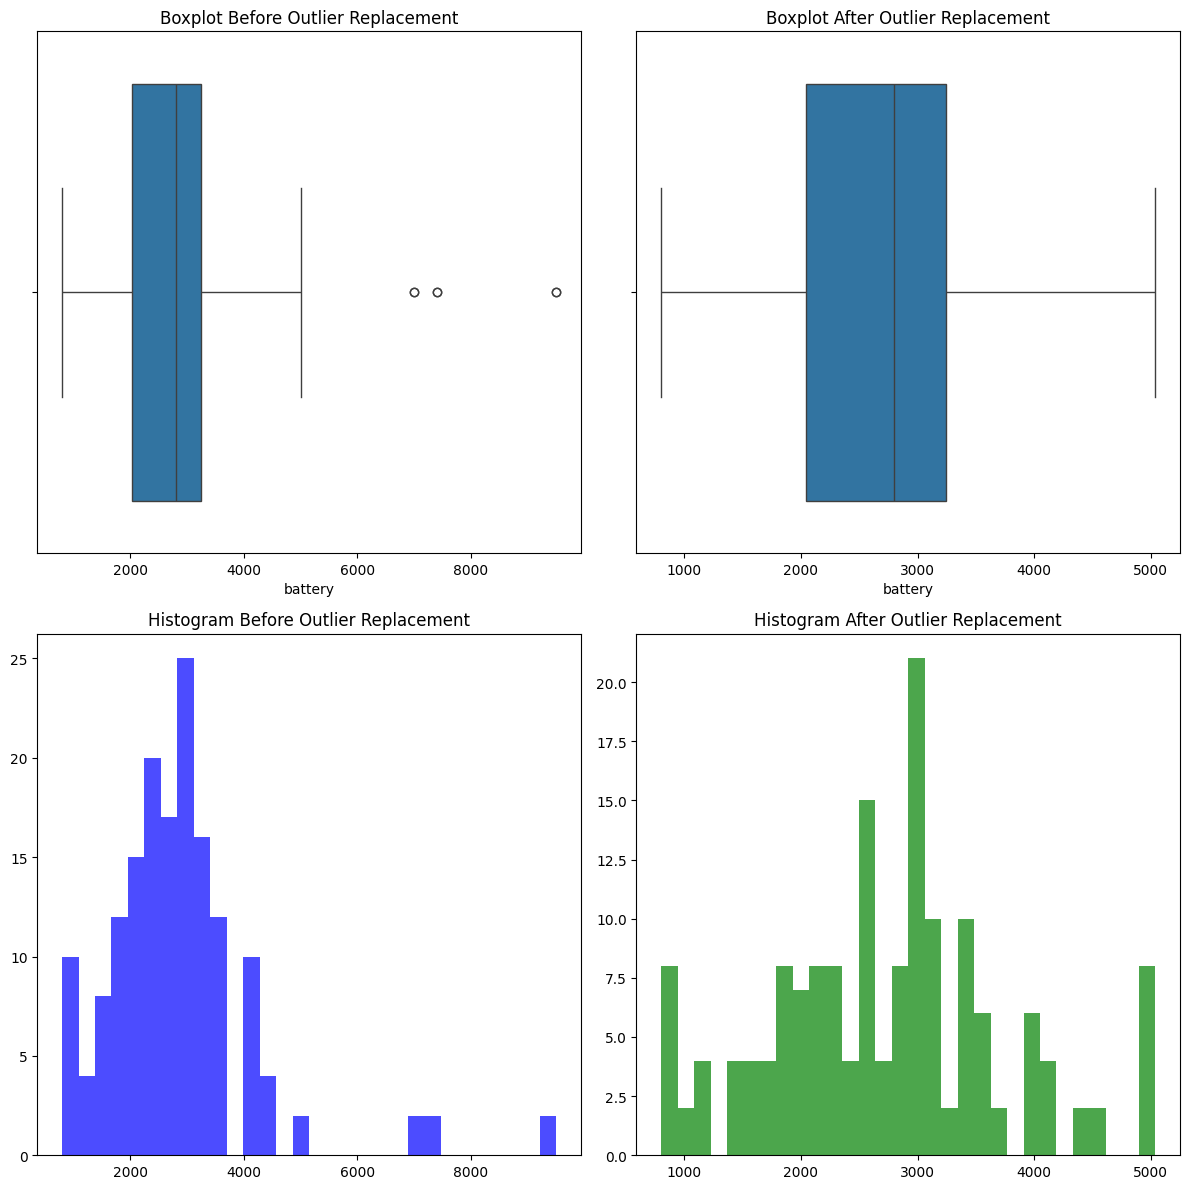

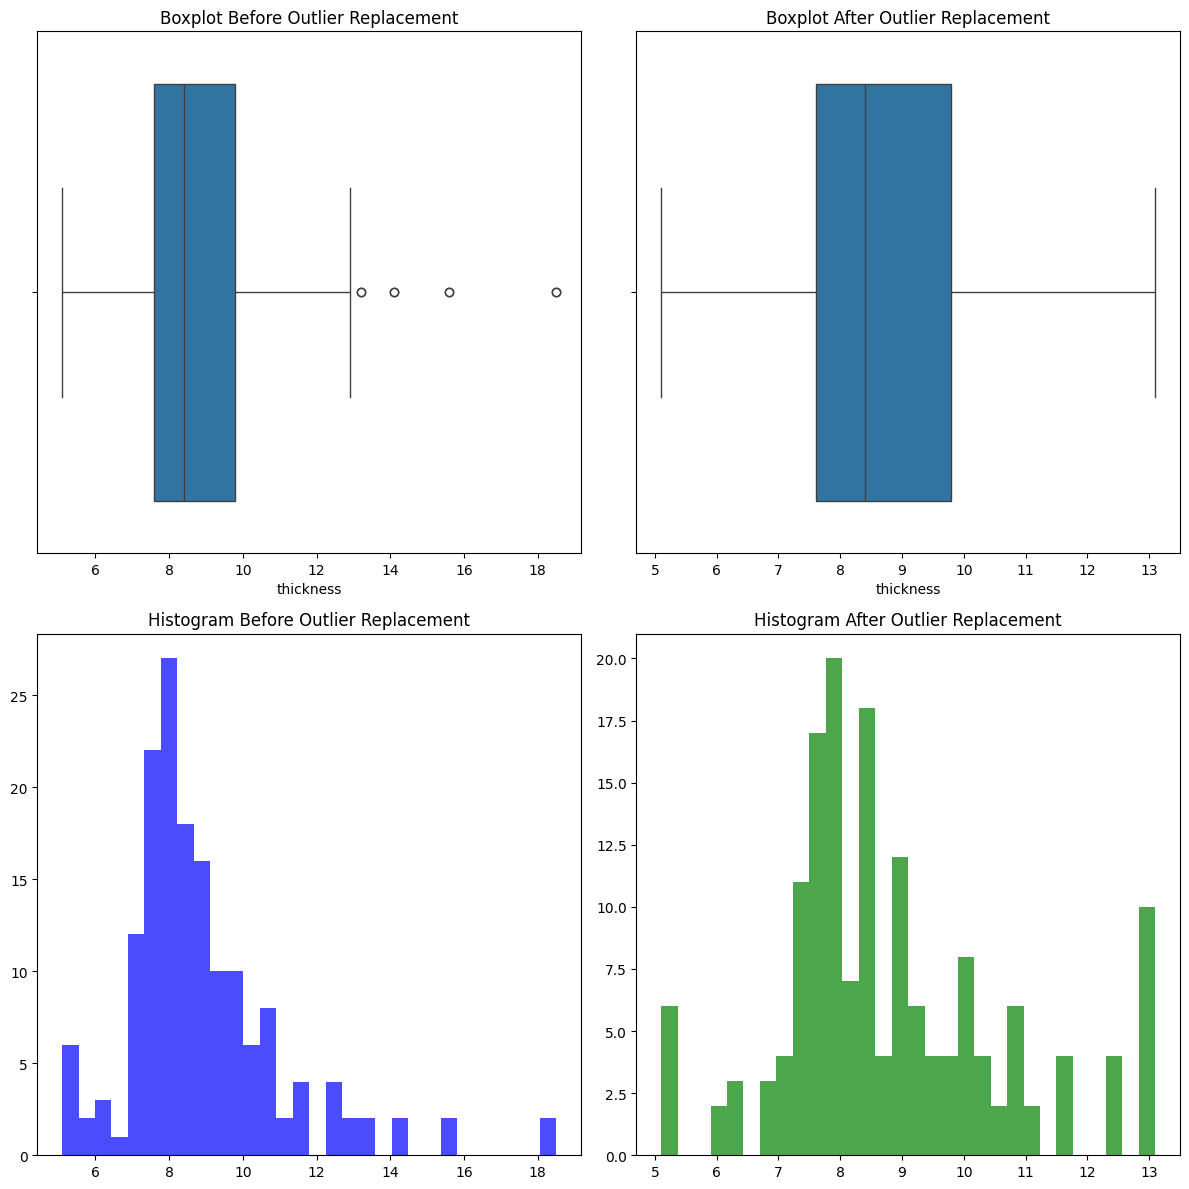

In [ ]:
# Assuming 'CellData' is a DataFrame already loaded in your workspace
if __name__ == "__main__":
    for column in CellData.columns:
        plot_boxplots_and_histograms(CellData, column)


the above shows.... note the data may need to be sanited before running so add in a function above to do that :)

### ANOVA Test

the code tests the categorical predictors against a target variable in the dataset. The function checks if there is a statistically significant difference in means for each categorical predictor with respect to the target variable (the Price).

In [ ]:
def FunctionAnova(inpData, TargetVar, CatPredList):
    SelectedPredictors=[]
    print('============== ANOVA ===============\n')
    from scipy.stats import f_oneway
    for predictor in CatPredList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVar].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if (AnovaResults[1] < 0.05):
            print(predictor, 'Correlation \n', TargetVar, '| Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'NO Correlation \n', TargetVar, '| Value:', AnovaResults[1])

    return(SelectedPredictors)

this is done by:
1. importing stament `f_oneway` (The test is called "one-way" because there is only one independent variable or factor under consideration, and it classifies subjects into different groups based on this single classification factor.)
2. then it is initializised through `SelectedPredictors=[]` which stores the names of the pedictors
3. the title is printed ` print('============== ANOVA ===============\n')`
4. the loop is created

```
for predictor in CatPredList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVar].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
```

* Groups the Data: The function groups the data in inpData by each category of the given predictor.
* Collects Values: For each group, it collects the values of TargetVar into a list.
* Creates List of Lists: This collection process results in a list of lists, where each inner list contains all the values of TargetVar that correspond to a specific category of the predictor.
* perform ANOVA test: `f_oneway(*CategoryGroupLists) `performs the one-way ANOVA test on the grouped data.
Noting the * is used to unpack the list.

5. Evaluating and printing Results
* Checking relevents: if it is less then 0.05 them there is a stistically important differance from the mean of the Price.

6. Print & Store:
*  Depending on whether the p-value indicates significance, it either:
  -  prints that there is a correlation and adds the predictor to SelectedPredictors
  -  prints that there is no correlation.

7. finally Returns the significant predictors




In [ ]:
CatPredList=["cpu core","RearCam","Front_Cam","resoloution"]
FunctionAnova(inpData=CellData,TargetVar='Price', CatPredList=CatPredList)

============== ANOVA ===============

cpu core Correlation 
 Price | Value: 3.721669566887769e-25
RearCam Correlation 
 Price | Value: 4.810966235170514e-43
Front_Cam Correlation 
 Price | Value: 2.370649577763112e-28
resoloution Correlation 
 Price | Value: 3.8580541035958067e-35


['cpu core', 'RearCam', 'Front_Cam', 'resoloution']

the above code is defining the
CatPredList function by stating the catagorical columns
the TsrgetVar function as price
the inpData as CellData our main data set

this will run through the `FunctionAnova` and output the data





### Data Preperation For Machine Learning

The Selected Columns is used to take the relvent columns and creating a secondary verable which will be used to run through the Machine Learning code.

the non relvent columns are as follows
- Price
  - with this being our target veriable by having price within the dat it create a sqew

- the sales
  - this the output of each product this does not determain the price. this varries from product to product
  - in the above data it also contains a high amount of outliers due to the fact that they very depending on product

- product id
   - this is just how each product is randomly definied and has no impact of the price

then the new defind data is called


In [ ]:
SelectedColumns=["weight","cpu freq","internal mem","ram","battery","thickness","ppi","cpu core","RearCam","Front_Cam","resoloution"]
MLData=CellData[SelectedColumns]
MLData.head()

,weight,cpu freq,internal mem,ram,battery,thickness,ppi,cpu core,RearCam,Front_Cam,resoloution
0,135.0,1.35,16.0,3.000,2610,7.4,424,8,13.00,8.0,5.2
1,125.0,1.30,4.0,1.000,1700,9.9,233,2,3.15,0.0,4.0
2,110.0,1.20,8.0,1.500,2000,7.6,312,4,13.00,5.0,4.7
3,118.5,1.30,4.0,0.512,1400,11.0,233,2,3.15,0.0,4.0
4,125.0,1.30,4.0,1.000,1700,9.9,233,2,3.15,0.0,4.0


The to_pickle method serializes the MLData DataFrame. Serialization is the process of converting an object into a format that can be saved to a file or transmitted over a network. In this case, the object is the DataFrame and the format is pickle.

In [ ]:
MLData.to_pickle('MLData.pkl')

the bellow code:
 1. Converts from categorical to numeric
  - The pd.get_dummies(MLData) function from the pandas library converts categorical variables in the MLData
  - DataFrame into binary dummy/indicator columns for each unique category value
  - creating a new DataFrame MLData_Numeric suitable for numerical input in machine learning models

In [ ]:
MLData_Numeric=pd.get_dummies(MLData)
MLData_Numeric['Price']=CellData['Price']
MLData_Numeric.head()

,weight,Price,cpu freq,internal mem,ram,battery,thickness,ppi,cpu core,RearCam,Front_Cam,resoloution
0,135.0,2357,1.35,16.0,3.000,2610,7.4,424,8,13.00,8.0,5.2
1,125.0,1749,1.30,4.0,1.000,1700,9.9,233,2,3.15,0.0,4.0
2,110.0,1916,1.20,8.0,1.500,2000,7.6,312,4,13.00,5.0,4.7
3,118.5,1315,1.30,4.0,0.512,1400,11.0,233,2,3.15,0.0,4.0
4,125.0,1749,1.30,4.0,1.000,1700,9.9,233,2,3.15,0.0,4.0


This code is preparing the dataset for training a machine learning model by defining which features to use, selecting the target variable, and splitting the data into training and testing sets to both train the model and evaluate its performance on unseen data. The use of training and testing sets helps validate the generalization ability of the model.

In [ ]:
TargetVar='Price'
Predictors=['weight', 'cpu freq', 'internal mem', 'ram', 'battery', 'thickness', 'ppi', 'cpu core', 'RearCam', 'Front_Cam', 'resoloution']

X=MLData_Numeric[Predictors].values
y=MLData_Numeric[TargetVar].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

This code prepares the dataset for machine learning by scaling the features to ensure they are on the same scale, which is important for many algorithms that are sensitive to the scale of input data (like gradient descent-based algorithms). It then splits the data into training and testing sets to allow for effective model training and evaluation.

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


The code you provided consists of print statements that output the shapes of the arrays

```
 X_train, y_train, X_test, and y_test
```

 These arrays represent the feature and target data split into training and testing sets.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 11)
(112,)
(49, 11)
(49,)


# Section 3

###Multiple Linear Regression Algorithm

resgresson analysis: is used to infer or predit another variavle based on the basis of one or more veriables.

Multiple linear regression uses several inderpendant veriables to prodict the dependant veriable that needs to be metric (in this case it is price). the formula bellow is:

simple linear regressionz: one verable podicting another and is the simplifyed formula of the the MLR
-  y = b.x+a

multiple linear regression forumla
 -  y = b1 . x1 + b2 . x2 +...+ bn . xn + a
  - Y is the dependant veriable
  - x1,x2,x3,ect is the inderpendant veriable
  - b1,b2,b3,ect the impact of the independant veriable on the dependant veriable
  - a the intercept or constant veriable

a model of a Multiple linear Regression:
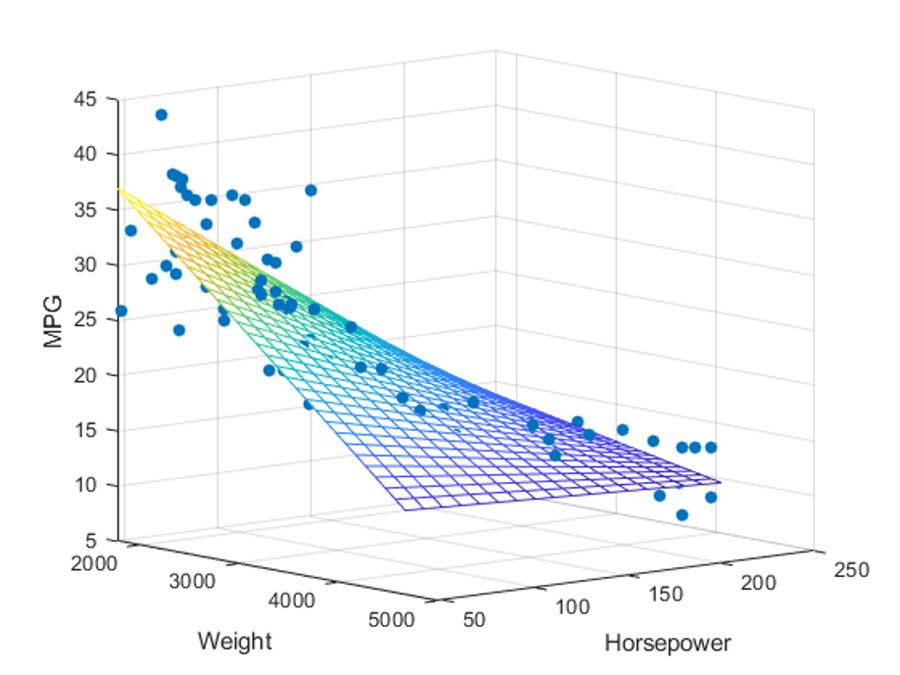

[Click here for more imformation on the graph or MLR](https://www.mathworks.com/discovery/linear-regression.html)

> **Above Figure:** Multiple linear regression example, which predicts the miles per gallon (MPG) of different cars (response variable,  Y
 ) based on weight and horsepower (predictor variables,  Xj
 ). (See MATLAB code example, how to use the regress function and determine significance of the multiple linear regression relationship.)


this graph show how the different inderpendant and dependat verable interact within the equation.



##### Model Validation and Accuracy Calculations ##########
     weight  cpu freq  internal mem       ram   battery  thickness       ppi  \
0  0.018049  0.000000       0.00000  0.001333  0.034483   0.582090  0.065693   
1  0.122271  0.444444       0.12500  0.166667  0.160920   0.253731  0.252555   
2  0.125182  0.925926       0.12500  0.500000  0.264368   0.164179  0.442336   
3  0.157205  0.481481       0.03125  0.085333  0.166667   0.305970  0.083212   
4  0.098981  0.444444       0.06250  0.085333  0.118391   0.305970  0.145985   

   cpu core   RearCam  Front_Cam  resoloution  Price  PredictedPrice  
0       0.0  0.000000      0.000     0.092593    833           901.0  
1       0.5  0.434783      0.045     0.333333   1676          1865.0  
2       0.5  0.900000      0.110     0.351852   2508          2659.0  
3       0.5  0.217391      0.000     0.379630   1777          1514.0  
4       0.5  0.217391      0.000     0.287037   1511          1620.0  
Mean Accuracy on test data: 93.4

In [1]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

print(RegModel)

LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVar]=y_test
TestingDataResults[('Predicted'+TargetVar)]=np.round(prediction)

print(TestingDataResults.head())


TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()


NameError: name 'X_train' is not defined

Explaining the MLR algorithm code:

1. sets yp the LRM
2. Fitting the Model & making Prodictions
3. evaluating the model
4. model validation & Accuracy Calculator
5. Custom Acuracy function & cross Validation

### Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9664023076213232

##### Model Validation and Accuracy Calculations ##########
   weight  cpu freq  internal mem  ram  battery  thickness    ppi  cpu core  \
0   133.5     1.300           8.0  1.0   1600.0       10.1  218.0       4.0   
1    97.0     1.700          16.0  1.0   2100.0        5.1  306.0       8.0   
2   112.0     1.400           8.0  1.0   1900.0        6.3  294.0       8.0   
3   158.0     1.875          64.0  6.0   3000.0        7.4  401.0       4.0   
4   180.0     1.750          32.0  3.0   3430.0        7.8  806.0       8.0   

   RearCam  Front_Cam  resoloution  Price  PredictedPrice  
0      5.0        0.0          4.5   1843          1638.0  
1      8.0        5.0          4.8   2323          2266.0  
2      8.0        8.0          5.0   2266          2266.0  
3     16.0        8.0          5.5   3055          3055.0  
4     23.0        5.1          5.5   3102          2732.0  
Mean Accuracy 

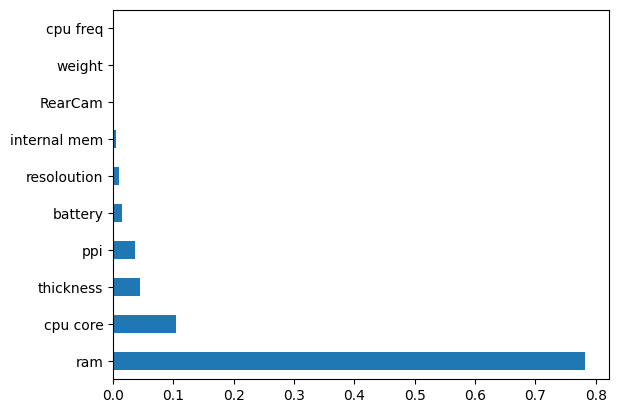

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting/Visualizing the Decision Tree

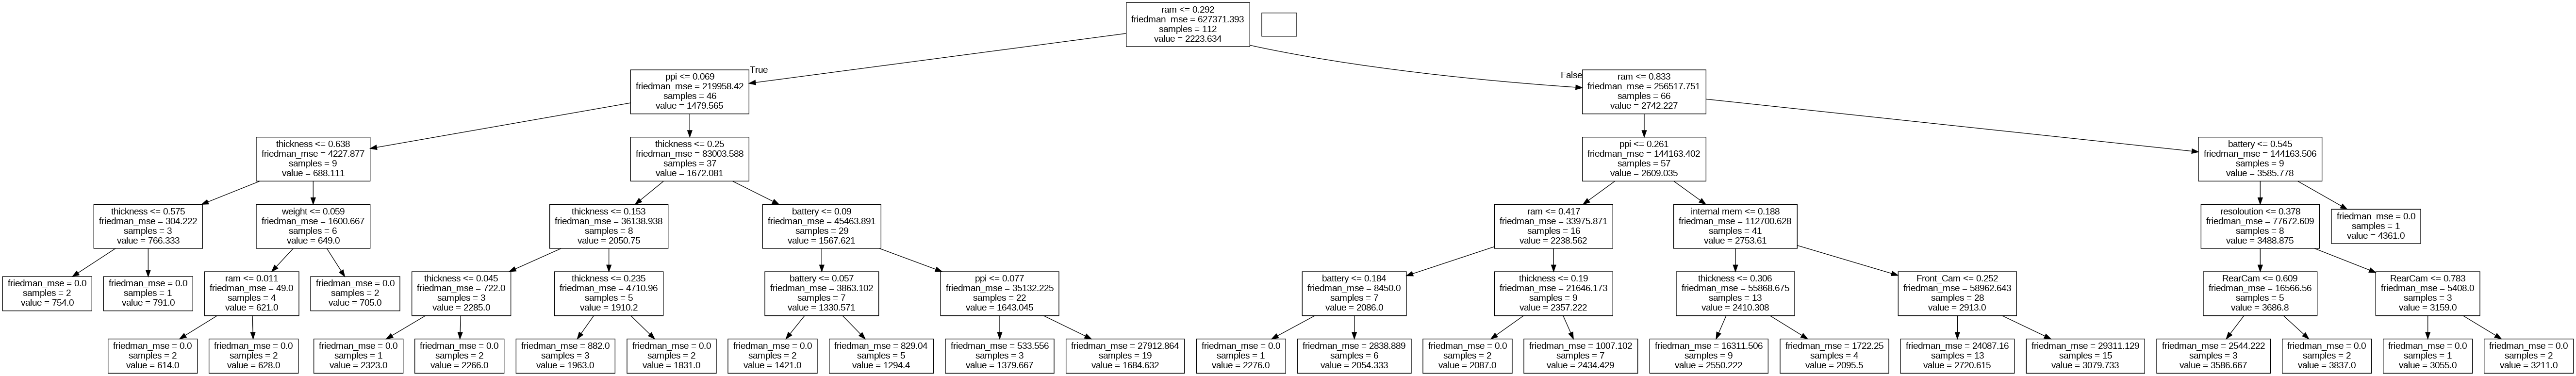

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=3700,height=1000)
# Double click on the graph to zoom in

### Random Foresr Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9715666117523027

##### Model Validation and Accuracy Calculations ##########
     weight  cpu freq  internal mem       ram   battery  thickness       ppi  \
0  0.018049  0.000000       0.00000  0.001333  0.034483   0.582090  0.065693   
1  0.122271  0.444444       0.12500  0.166667  0.160920   0.253731  0.252555   
2  0.125182  0.925926       0.12500  0.500000  0.264368   0.164179  0.442336   
3  0.157205  0.481481       0.03125  0.085333  0.166667   0.305970  0.083212   
4  0.098981  0.444444       0.06250  0.085333  0.118391   0.305970  0.145985   

   cpu core   RearCam  Front_Cam  resoloution  Price  PredictedPrice  
0       0.0  0.000000      0.000     0.092593    833           818.0  
1       0.5  0.434783      0.045     0.333333   1676          1823.0  
2       0.5  0.900000      0.110     0.351852   2508          2576.0  
3       0.5  0.217391      0.000     0.379630   1777          1659

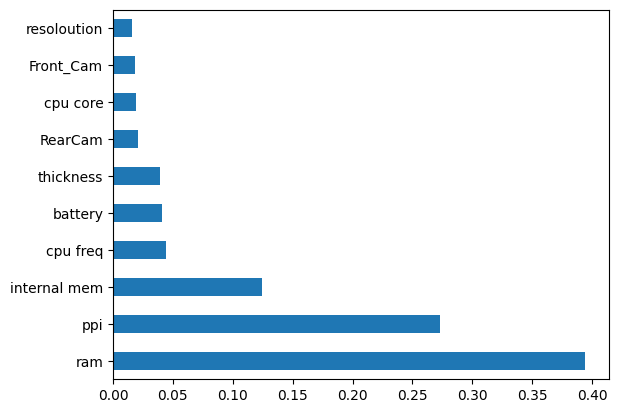

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting on of the Decision Tree in Random Forest Regressor

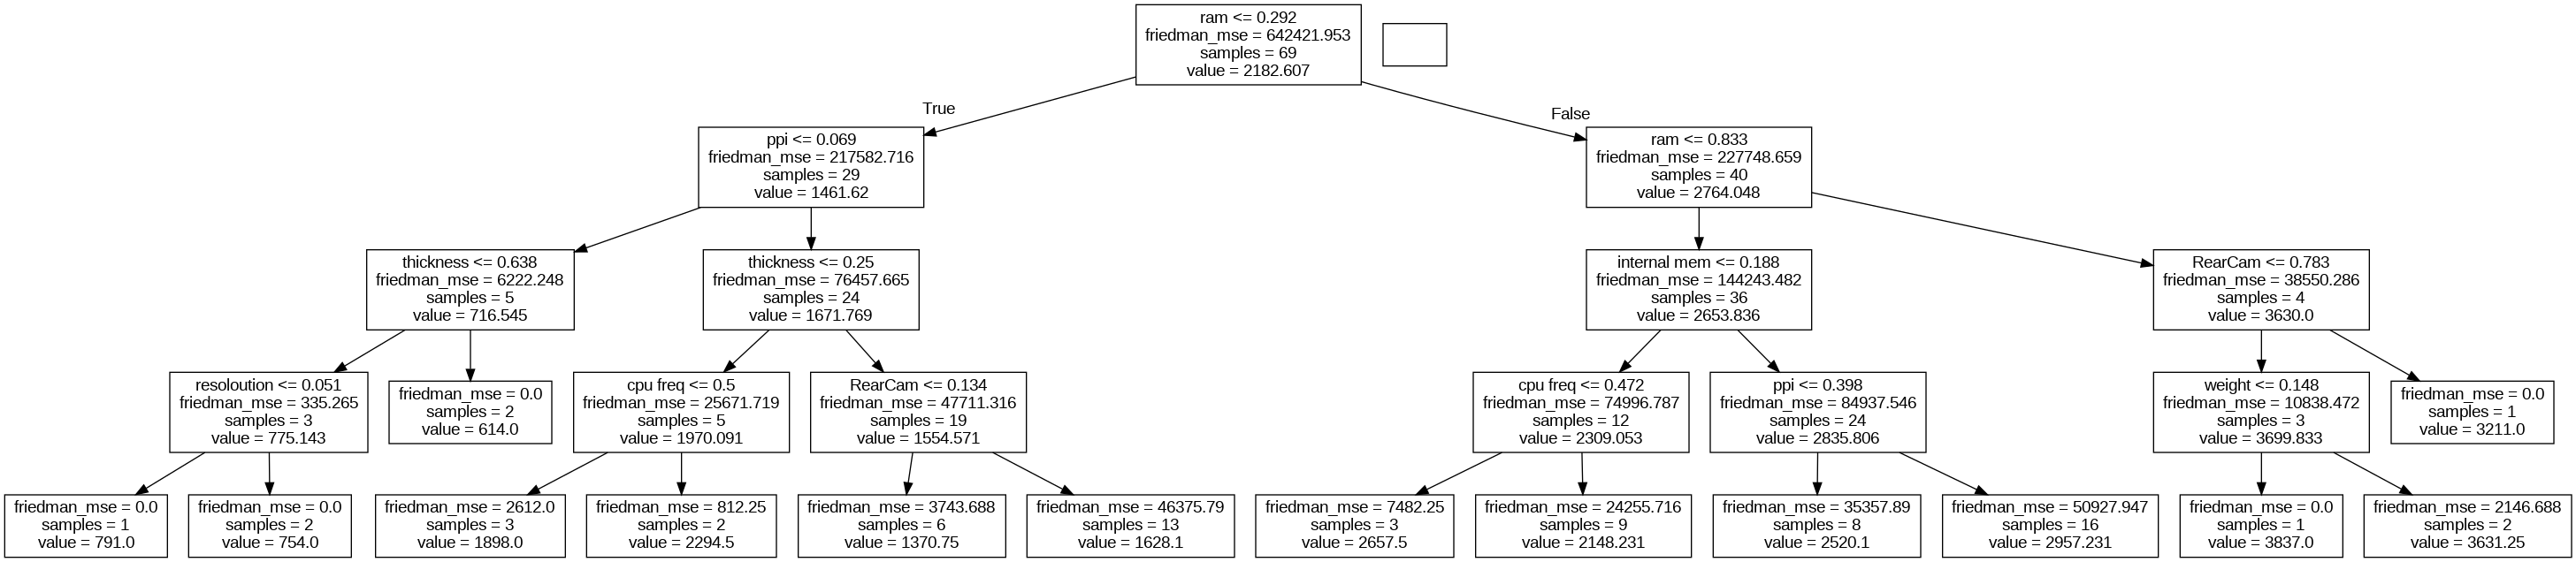

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2500,height=600)
# Double click on the graph to zoom in

###Adaboot Alogrithm for ML/AI Model Building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9580284091432321

##### Model Validation and Accuracy Calculations ##########
     weight  cpu freq  internal mem       ram   battery  thickness       ppi  \
0  0.018049  0.000000       0.00000  0.001333  0.034483   0.582090  0.065693   
1  0.122271  0.444444       0.12500  0.166667  0.160920   0.253731  0.252555   
2  0.125182  0.925926       0.12500  0.500000  0.264368   0.164179  0.442336   
3  0.157205  0.481481       0.03125  0.085333  0.166667   0.305970  0.083212   
4  0.098981  0.444444       0.06250  0.085333  0.118391   0.305970  0.145985   

   cpu core   RearCam  Front_Cam  resoloution  Price  PredictedPrice  
0       0.0  0.000000      0.000     0.092593    833           718.0  
1       0.5  0.434783      0.045     0.333333   1676          1770.0  
2       0.5  0.900000      0.110     0.351852   2508          2558.0  
3       0.5  0.21739

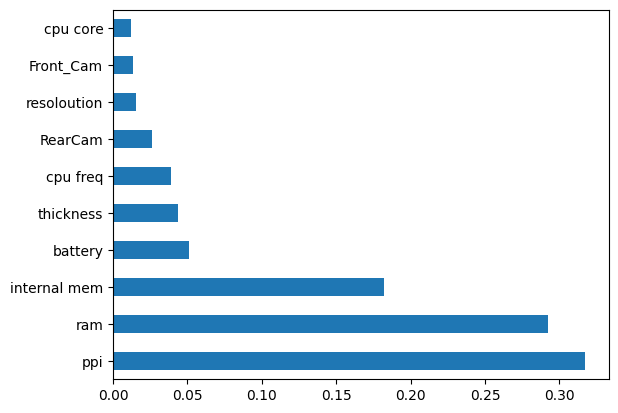

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###XGBOOST Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9999963820096567

##### Model Validation and Accuracy Calculations ##########
     weight  cpu freq  internal mem       ram   battery  thickness       ppi  \
0  0.018049  0.000000       0.00000  0.001333  0.034483   0.582090  0.065693  

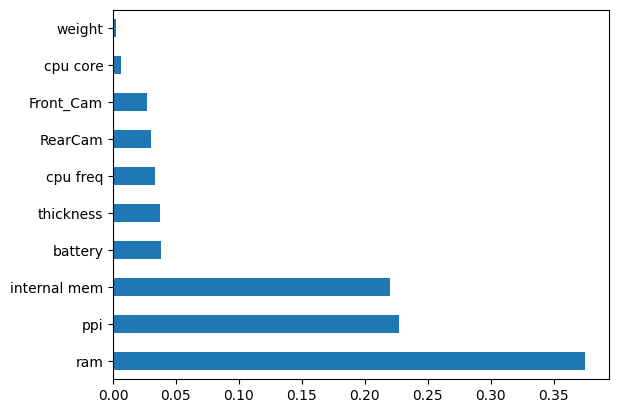

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Single Desision Tree

<Axes: >

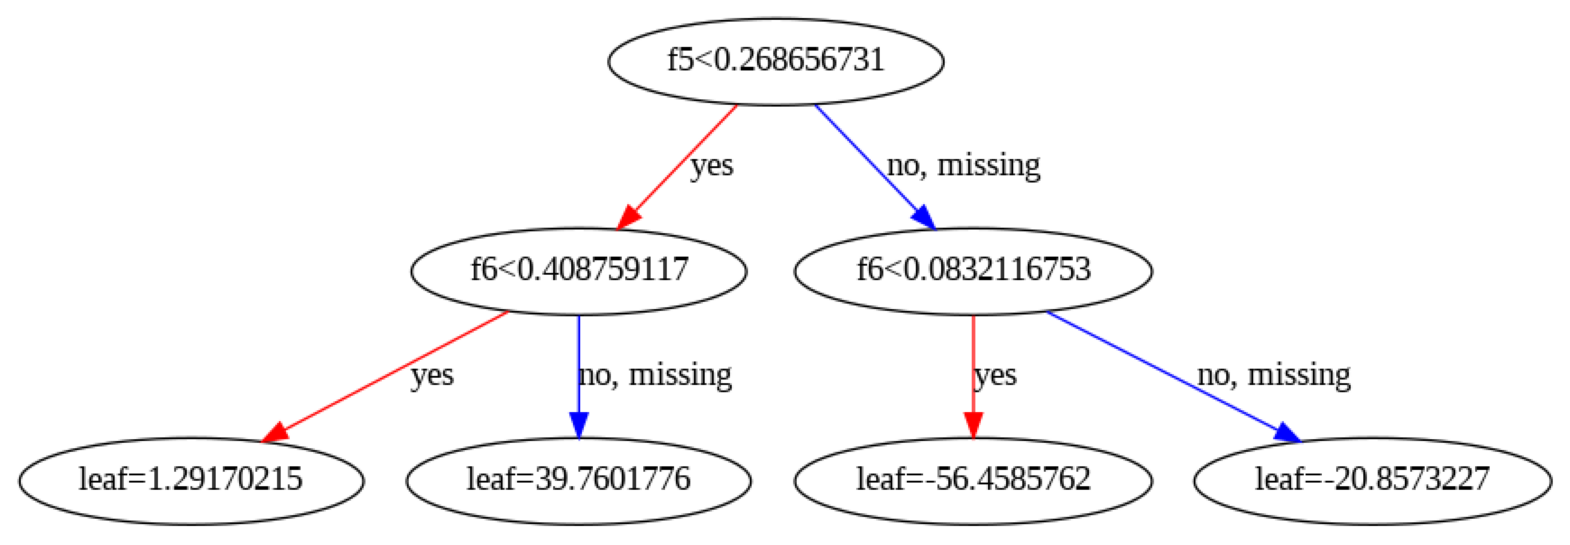

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

### K_Nearest Neighbor (KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9653184848294322

##### Model Validation and Accuracy Calculations ##########
     weight  cpu freq  internal mem       ram   battery  thickness       ppi  \
0  0.018049  0.000000       0.00000  0.001333  0.034483   0.582090  0.065693   
1  0.122271  0.444444       0.12500  0.166667  0.160920   0.253731  0.252555   
2  0.125182  0.925926       0.12500  0.500000  0.264368   0.164179  0.442336   
3  0.157205  0.481481       0.03125  0.085333  0.166667   0.305970  0.083212   
4  0.098981  0.444444       0.06250  0.085333  0.118391   0.305970  0.145985   

   cpu core   RearCam  Front_Cam  resoloution  Price  PredictedPrice  
0       0.0  0.000000      0.000     0.092593    833           707.0  
1       0.5  0.434783      0.045     0.333333   1676          1715.0  
2       0.5  0.900000      0.110     0.351852   2508          2556.0  
3       0.5  0.217391      0.000     0.379630   1777          1710.0  
4       0.5  0.217391      0.000     0.

### SMV Refressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.06422027825985455

##### Model Validation and Accuracy Calculations ##########
     weight  cpu freq  internal mem       ram   battery  thickness       ppi  \
0  0.018049  0.000000       0.00000  0.001333  0.034483   0.582090  0.065693   
1  0.122271  0.444444       0.12500  0.166667  0.160920   0.253731  0.252555   
2  0.125182  0.925926       0.12500  0.500000  0.264368   0.164179  0.442336   
3  0.157205  0.481481       0.03125  0.085333  0.166667   0.305970  0.083212   
4  0.098981  0.444444       0.06250  0.085333  0.118391   0.305970  0.145985   

   cpu core   RearCam  Front_Cam  resoloution  Price  PredictedPrice  
0       0.0  0.000000      0.000     0.092593    833          2211.0  
1       0.5  0.434783      0.045     0.333333   1676          2250.0  
2       0.5  0.900000      0.110     0.351852   2508          2280.0  
3       0.5  0.217391      0.000     0.379630   1777          2239.0  
4       0.5  0.217391      0.000     0.287037   151

## Cross Validation

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [93.09975607 94.43972857 92.10456774 91.38199937 94.69988534 94.90647924
 94.16299449 91.95602096 91.11950393 89.39107993]

Final Average Accuracy of the model: 92.73


##???

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['weight', 'cpu freq', 'internal mem', 'ram', 'battery',
       'thickness', 'ppi', 'cpu core', 'RearCam', 'Front_Cam', 'resoloution']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(161, 11)
(161,)


In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Section 4